# **French Adjectives Gender Classification in Word Embeddings: SHAP  Analysis on a MLP Model**

# Step 1: Dataset Laoding (French Adjectives Embeddings)

In [ ]:
!pip install gdown


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import gdown
import pandas as pd

# Define the French Adjectives Embeddings files links and corresponding output file names
file_links = {
    #"camem_bert_base_embeddings": "1D7jbsNIinPTapETRzWimlPyU0y8tx49P",
    #"distilled_bert_base_cased": "1B_v8U57fw-fQ21PCDfUYDXgcxYRGNPIV",
    "flaubert_base_cased": "1aOx8haNtEv62I6tQJ-llG-9stVnr9DHY",
    "flaubert_base_uncased": "1DoQb9z7DEReXuNql8iZngkjti2Qz-2FE",
    "flaubert_large_uncased": "1zbZK9AkTpldW3f0zcw0jJ0zeJ_56CBb_",
    "flaubert_small_cased": "1Hk8FJfGxic7hAFIUcbdVTAuGo0eFNdza",
    #"mbert_base_cased": "1ULJOGhMS7bpXruv3sS1UJLyhDFAznXVE",
    #"mbert_base_uncased": "1MBTqcVxvwVPbnDBxqy7BPxx72ZOxIsw_",
    #"xlmr_r_large": "1J43o7gZslJemN8HMdSPzkhENMW52wFVX",
    #"xlm_roberta_base": "1MeYKcyXWpBNYhiYHMVHlwEgkWomyufxX"
}

# Dictionary to store dataframes
dataframes = {}

# Download files and load into dataframes
for name, file_id in file_links.items():
    output_file = f"{name}.csv"
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

    try:
        df = pd.read_csv(output_file)  # Try loading as CSV
    except Exception:
        try:
            df = pd.read_excel(output_file)  # Try loading as Excel
        except Exception:
            df = None  # If neither CSV nor Excel, set to None

    if df is not None:
        dataframes[name] = df
        print(f"Loaded {name} into dataframe with shape {df.shape}")
    else:
        print(f"Failed to load {name}, file format unknown.\n\n")


Downloading...
From: https://drive.google.com/uc?id=1aOx8haNtEv62I6tQJ-llG-9stVnr9DHY
To: /content/flaubert_base_cased.csv
100%|██████████| 53.7M/53.7M [00:01<00:00, 44.4MB/s]


Loaded flaubert_base_cased into dataframe with shape (6504, 770)


Downloading...
From: https://drive.google.com/uc?id=1DoQb9z7DEReXuNql8iZngkjti2Qz-2FE
To: /content/flaubert_base_uncased.csv
100%|██████████| 63.3M/63.3M [00:01<00:00, 58.8MB/s]


Loaded flaubert_base_uncased into dataframe with shape (7590, 770)


Downloading...
From: https://drive.google.com/uc?id=1zbZK9AkTpldW3f0zcw0jJ0zeJ_56CBb_
To: /content/flaubert_large_uncased.csv
100%|██████████| 68.4M/68.4M [00:00<00:00, 138MB/s]


Loaded flaubert_large_uncased into dataframe with shape (6504, 1026)


Downloading...
From: https://drive.google.com/uc?id=1Hk8FJfGxic7hAFIUcbdVTAuGo0eFNdza
To: /content/flaubert_small_cased.csv
100%|██████████| 34.7M/34.7M [00:00<00:00, 95.8MB/s]


Loaded flaubert_small_cased into dataframe with shape (6504, 514)


# Step 2: Exploratory Data Analysis (EDA)

### 2.1 Dataset Head

In [2]:
# Display first few rows of each loaded dataframe
for name, df in dataframes.items():
    print(f"\nDataset: {name}")
    display(df.head())  # Display first few rows
    print("=" * 80)



Dataset: flaubert_base_cased


Word         0         1         2         3         4         5  \
0      abaissé -0.918781  1.270494  0.499801 -1.218287 -1.628986 -1.613672   
1    abandonné  2.863762 -1.059737 -1.486443 -2.744633 -1.571150 -0.641777   
2   abandonnés -0.371296 -0.050010  0.533110 -0.851078 -0.600845 -0.739243   
3   abandonnée -1.186011  0.007531  0.194924 -1.352353 -0.308535 -0.288511   
4  abandonnées -2.222785  1.152770 -0.684513  1.603904  0.768779 -0.852416   

          6         7         8  ...       759       760       761       762  \
0 -0.797011 -0.651525  3.594234  ... -0.640286 -0.733001  2.273470 -1.890065   
1  1.524477  2.084344  1.240918  ... -0.289288 -2.012972 -0.572296 -1.816853   
2  1.456376 -1.529993  2.805923  ... -1.530287 -1.483397  1.260332 -0.036269   
3  1.979470  0.428561  0.493124  ... -1.367204 -1.750390  2.242464 -0.547705   
4  2.557635 -0.684933  0.009467  ... -0.093439 -2.533424  2.458004 -0.163610   

        763       764       765       766       767  Gender  
0  0.101750 -1.427633  1.774759  2.584023  1.554491       1  
1 -0.209396  1.236967 -0.053298 -2.778430  2.007350       1  
2  0.846842  1.064330 -0.563699 -1.299612  1.180093       1  
3  0.838512 -0.339999 -1.398915 -0.775970  2.066413       0  
4  2.217702 -0.281115 -2.738135 -0.114744  2.793698       0  

[5 rows x 770 columns]


Dataset: flaubert_base_uncased


Word         0         1         2         3         4         5  \
0      abaissé  2.621718  1.058196 -2.318899 -1.674511 -1.074355 -1.643577   
1    abandonné  0.280524 -0.144711  0.528185  0.144140  0.230183 -0.040055   
2   abandonnés  1.061980  0.936795 -0.518378 -0.936642 -0.155399  0.704027   
3   abandonnée  0.294893 -0.103359  0.503212  0.199510  0.236652 -0.058838   
4  abandonnées  0.594621  1.257480 -0.362478 -1.021854  0.135070  1.066053   

          6         7         8  ...       759       760       761       762  \
0  1.386274  0.010937 -0.799108  ... -0.415430 -0.834220  0.271153 -1.047917   
1  0.268016 -0.565140 -0.554367  ...  0.116858 -1.009973 -0.006870 -0.074967   
2 -0.052653 -1.176456  0.391137  ...  0.853773 -1.275528 -0.637556  0.106471   
3  0.267703 -0.527025 -0.566889  ...  0.075058 -0.972327 -0.036799 -0.053553   
4  0.050838  0.242360  2.544349  ...  0.759872 -0.282840 -0.450266 -0.805945   

        763       764       765       766       767  Gender  
0 -1.927666 -1.488610  0.514340  2.111289 -2.326296       1  
1  0.373439 -0.349506  0.394734  0.784362  0.289680       1  
2 -0.304190 -0.057929  0.684608  1.271967 -1.233760       1  
3  0.362556 -0.299846  0.465510  0.766712  0.307228       0  
4  0.970804 -0.968628  1.725146 -0.802008 -1.728689       0  

[5 rows x 770 columns]


Dataset: flaubert_large_uncased


Word          0         1         2         3          4          5  \
0      abaissé   8.417181  2.991504  7.223108  1.804217  -1.662505  -1.405776   
1    abandonné   7.530680 -2.721532  0.976377  3.504943  -8.003117 -11.467283   
2   abandonnés  10.655356 -1.363855  1.617834  3.609336  -4.177451  -2.333333   
3   abandonnée   6.289164 -0.849660  2.392667  1.224719  -7.215847  -6.416592   
4  abandonnées  11.004598  2.897560  2.697474  1.960002 -10.596423  -2.876914   

          6         7         8  ...      1015       1016      1017      1018  \
0 -6.990140 -1.935549 -0.866295  ... -8.055243   1.889913  4.684276 -4.807503   
1 -8.396865 -4.816326 -1.449822  ... -8.277680  11.013186 -3.393347  0.810191   
2 -7.140361 -9.443039  0.824445  ... -3.135538  11.558518 -7.171202  3.666796   
3 -7.608029 -4.185183 -0.070570  ... -8.475337   7.477155 -1.527506 -2.160920   
4 -5.803624 -4.449602 -3.424097  ... -7.130783  12.722145 -6.090196 -3.009981   

       1019      1020       1021       1022      1023  Gender  
0  4.246702 -8.148845   5.317069  -1.790614 -4.958454       1  
1 -2.409187 -0.509441  10.261601  -0.939758 -2.023417       1  
2  2.480921 -3.236192  10.690329 -15.576269 -2.418116       1  
3  2.176750 -3.993118  12.508919  -1.872578 -4.119229       0  
4  1.481291 -2.492039  12.758733 -11.315008 -2.102387       0  

[5 rows x 1026 columns]


Dataset: flaubert_small_cased


Word         0         1         2         3         4         5  \
0      abaissé -0.900003 -2.879976  4.960131 -0.483776 -2.544397 -3.173748   
1    abandonné  3.975725  1.015186  0.763171 -3.765544 -0.216141 -7.908770   
2   abandonnés  4.381264  2.659397 -0.302109  0.330213 -0.782303 -5.653428   
3   abandonnée  3.936753  1.365096  0.601900 -3.841948  0.137243 -6.720107   
4  abandonnées  5.809262  1.358246  0.284348 -5.529526  0.384123 -7.862865   

          6         7         8  ...       503       504       505       506  \
0  1.268426  1.158909  3.327399  ...  2.768781 -3.027293  0.653054 -0.005547   
1 -2.510229  1.091638 -3.004829  ... -3.444683 -0.447361 -5.088787 -0.067820   
2 -1.347949  2.838606 -5.429182  ... -2.035767  0.316176 -2.783939 -0.994179   
3 -4.014627 -0.164518 -4.163127  ...  0.635821 -1.122231 -4.691674 -1.861965   
4 -0.806412  2.218282 -5.085275  ...  0.690692 -0.932139 -2.969352 -4.903651   

        507       508       509       510       511  Gender  
0 -4.565602 -7.752979 -2.755292  2.423891 -0.766143       1  
1 -6.931626 -4.377660 -5.601128  2.917005 -6.060720       1  
2 -3.623413 -3.733535 -5.347573  4.459940 -1.087981       1  
3 -7.399370 -3.871465 -4.995703  4.840462 -0.697729       0  
4 -5.584019 -3.111172 -3.887118  3.173834 -0.738421       0  

[5 rows x 514 columns]

### 2.2 Embedding Dimensions in Model

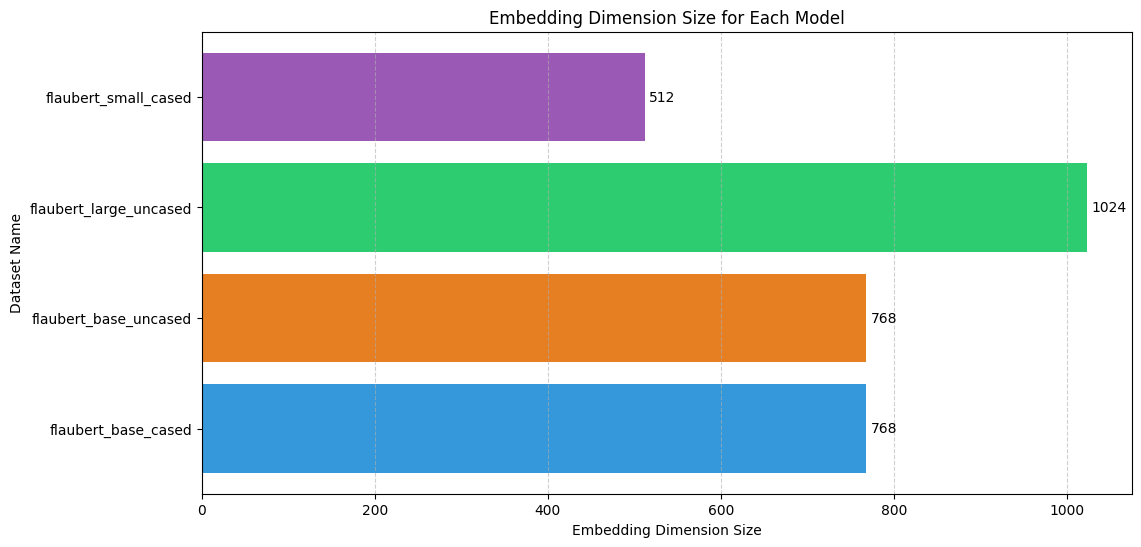

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define alternating colors
bar_colors = ["#3498db", "#e67e22", "#2ecc71", "#9b59b6", "#f1c40f", "#1abc9c", "#d35400", "#16a085", "#c0392b", "#2980b9"]

# Function to plot embedding dimension length with alternating colors
def plot_embedding_dimensions(dataframes):
    dataset_names = []
    embedding_sizes = []

    # Extract embedding sizes
    for name, df in dataframes.items():
        # The number of embedding dimensions is the total columns minus the "Word" and "Gender" columns
        if "Gender" in df.columns and "Word" in df.columns:
            embedding_size = df.shape[1] - 2  # Subtract "Word" and "Gender" columns
        else:
            embedding_size = df.shape[1] - 1  # If "Gender" is missing, assume only "Word" is non-embedding

        dataset_names.append(name)
        embedding_sizes.append(embedding_size)

    # Create horizontal bar chart
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    plt.figure(figsize=(12, 6))

    # Plot bars with alternating colors
    for i, (name, size) in enumerate(zip(dataset_names, embedding_sizes)):
        plt.barh(y_positions[i], size, color=bar_colors[i % len(bar_colors)])  # Alternate colors
        plt.text(size + 5, y_positions[i], str(size), va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Embedding Dimension Size")
    plt.ylabel("Dataset Name")
    plt.title("Embedding Dimension Size for Each Model")
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Call the function to plot embedding dimension lengths
plot_embedding_dimensions(dataframes)


### 2.4 Class Distribution and Balancing

Showing  French Adjectives Original Gender Distribution:


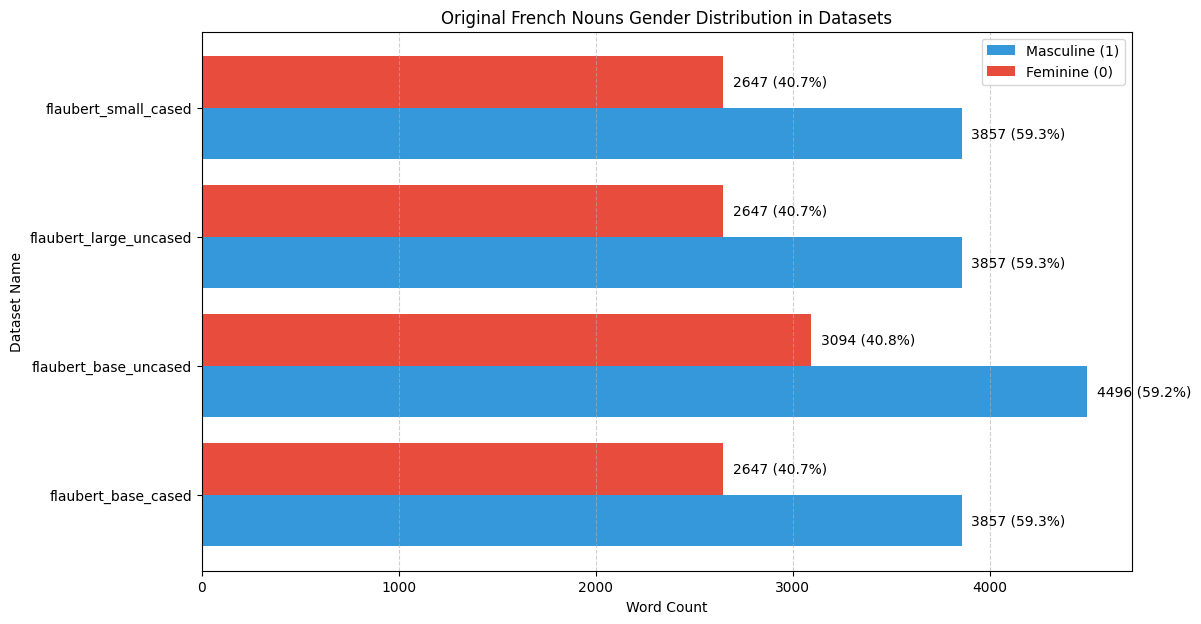

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot gender distribution as a horizontal bar chart
def plot_gender_distribution_bar_chart(dataframes, title="Gender Distribution in Datasets"):
    dataset_names = []
    masculine_counts = []
    feminine_counts = []
    total_counts = []

    # Extract gender counts for each dataset
    for name, df in dataframes.items():
        if "Gender" in df.columns:
            gender_counts = df["Gender"].value_counts()
            dataset_names.append(name)
            masculine_count = gender_counts.get(1, 0)  # Count Masculine (1)
            feminine_count = gender_counts.get(0, 0)  # Count Feminine (0)
            total_count = masculine_count + feminine_count  # Total words

            masculine_counts.append(masculine_count)
            feminine_counts.append(feminine_count)
            total_counts.append(total_count)

    # Convert counts to percentages
    masculine_percentages = [round((m / t) * 100, 1) if t > 0 else 0 for m, t in zip(masculine_counts, total_counts)]
    feminine_percentages = [round((f / t) * 100, 1) if t > 0 else 0 for f, t in zip(feminine_counts, total_counts)]

    # Bar width
    bar_width = 0.4
    y_positions = np.arange(len(dataset_names))  # Y-axis positions

    # Create figure
    plt.figure(figsize=(12, 7))

    # Plot bars for Masculine and Feminine
    plt.barh(y_positions - bar_width/2, masculine_counts, height=bar_width, label="Masculine (1)", color="#3498db")
    plt.barh(y_positions + bar_width/2, feminine_counts, height=bar_width, label="Feminine (0)", color="#e74c3c")

    # Add data labels (both count and percentage) on bars
    for i, (m_count, f_count, m_percent, f_percent) in enumerate(zip(masculine_counts, feminine_counts, masculine_percentages, feminine_percentages)):
        plt.text(m_count + 50, y_positions[i] - bar_width/2, f"{m_count} ({m_percent}%)", va="center", fontsize=10, color="black")
        plt.text(f_count + 50, y_positions[i] + bar_width/2, f"{f_count} ({f_percent}%)", va="center", fontsize=10, color="black")

    # Labels and Title
    plt.xlabel("Word Count")
    plt.ylabel("Dataset Name")
    plt.title(title)
    plt.yticks(y_positions, dataset_names)  # Set dataset names on y-axis
    plt.legend()
    plt.grid(axis="x", linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Show original distribution
print("Showing  French Adjectives Original Gender Distribution:")
plot_gender_distribution_bar_chart(dataframes, title="Original French Nouns Gender Distribution in Datasets")


Showing French Adjectives Gender Distribution After Undersampling:


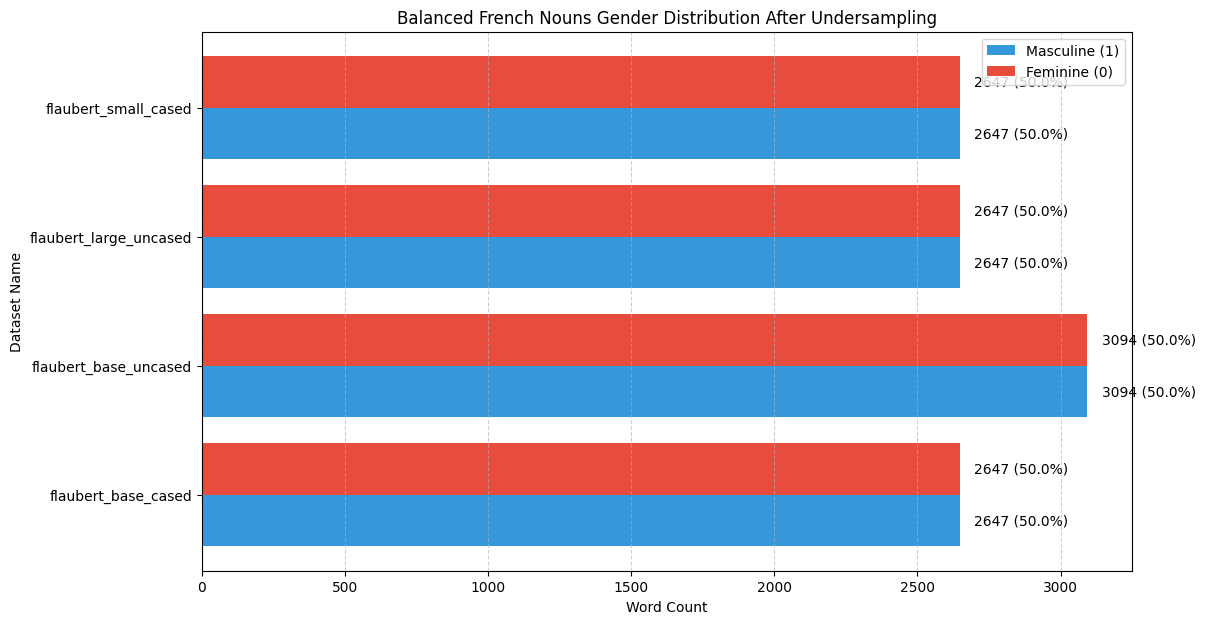

In [5]:
# Apply undersampling (reduce larger class to match smaller class)
balanced_dataframes = {}
for name, df in dataframes.items():
    if "Gender" in df.columns:
        masculine_df = df[df["Gender"] == 1]
        feminine_df = df[df["Gender"] == 0]

        # Find the smaller class size
        min_class_size = min(len(masculine_df), len(feminine_df))

        # Randomly sample from both classes
        masculine_sampled = masculine_df.sample(min_class_size, random_state=42)
        feminine_sampled = feminine_df.sample(min_class_size, random_state=42)

        # Concatenate and shuffle
        balanced_df = pd.concat([masculine_sampled, feminine_sampled]).sample(frac=1, random_state=42)

        # Store the balanced dataset
        balanced_dataframes[name] = balanced_df

# Show distribution after balancing
print("\nShowing French Adjectives Gender Distribution After Undersampling:")
plot_gender_distribution_bar_chart(balanced_dataframes, title="Balanced French Nouns Gender Distribution After Undersampling")


# Step 3) Train a Multilayerr Perceptron (MLP) (Baseline on all Embeddings)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set dataset size percentage for training
dataset_percentage = 100  # Change this to any value between 1 and 100

# Dictionaries to store models, performance, loss curves, and timing
model_accuracies = {}
training_accuracies = {}
trained_models = {}
test_data = {}
loss_curves = {}
training_times = {}

# Loop through each dataset and train an MLP model
for name, df in dataframes.items():
    print("-" * 70)
    print(f"\nTraining MLP Model on {name} Dataset...")

    if "Gender" in df.columns and "Word" in df.columns:
        X = df.drop(columns=["Word", "Gender"]).values
        y = df["Gender"].values
    else:
        print(f"Skipping {name} (Missing required columns)")
        continue

    if len(df) < 2:
        print(f"{name} dataset is too small, skipping...")
        continue

    if dataset_percentage < 100:
        X_sample, _, y_sample, _ = train_test_split(
            X, y,
            train_size=dataset_percentage / 100,
            stratify=y,
            random_state=42
        )
    else:
        X_sample = X
        y_sample = y

    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample,
        test_size=0.2,
        stratify=y_sample,
        random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize model
    mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    max_iter=300,
    solver='sgd',          # or try 'sgd' with momentum
    learning_rate_init=0.001, # slight reduction if using adam
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    alpha=0.1,
    random_state=42,
)


    # Time the training
    start_time = time.time()
    mlp.fit(X_train_scaled, y_train)
    end_time = time.time()
    elapsed = end_time - start_time
    training_times[name] = elapsed  # <-- Store training time

    # Store results
    trained_models[name] = mlp
    test_data[name] = (X_test_scaled, y_test)
    loss_curves[name] = mlp.loss_curve_

    # Evaluate
    train_acc = accuracy_score(y_train, mlp.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))

    training_accuracies[name] = train_acc
    model_accuracies[name] = test_acc

    print(f"\nTraining Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print(f"Training Time: {elapsed:.2f} seconds")
    print(classification_report(y_test, mlp.predict(X_test_scaled), target_names=["Feminine (0)", "Masculine (1)"]))


----------------------------------------------------------------------

Training MLP Model on flaubert_base_cased Dataset...

Training Accuracy: 0.9410
Testing Accuracy: 0.8194
Training Time: 6.89 seconds
               precision    recall  f1-score   support

 Feminine (0)       0.79      0.75      0.77       529
Masculine (1)       0.84      0.87      0.85       772

     accuracy                           0.82      1301
    macro avg       0.81      0.81      0.81      1301
 weighted avg       0.82      0.82      0.82      1301

----------------------------------------------------------------------

Training MLP Model on flaubert_base_uncased Dataset...

Training Accuracy: 0.7658
Testing Accuracy: 0.6634
Training Time: 6.88 seconds
               precision    recall  f1-score   support

 Feminine (0)       0.64      0.41      0.50       619
Masculine (1)       0.67      0.84      0.75       899

     accuracy                           0.66      1518
    macro avg       0.65      0.6

### 3.1 Evaluate Performance of MLP (on all available embeddings)

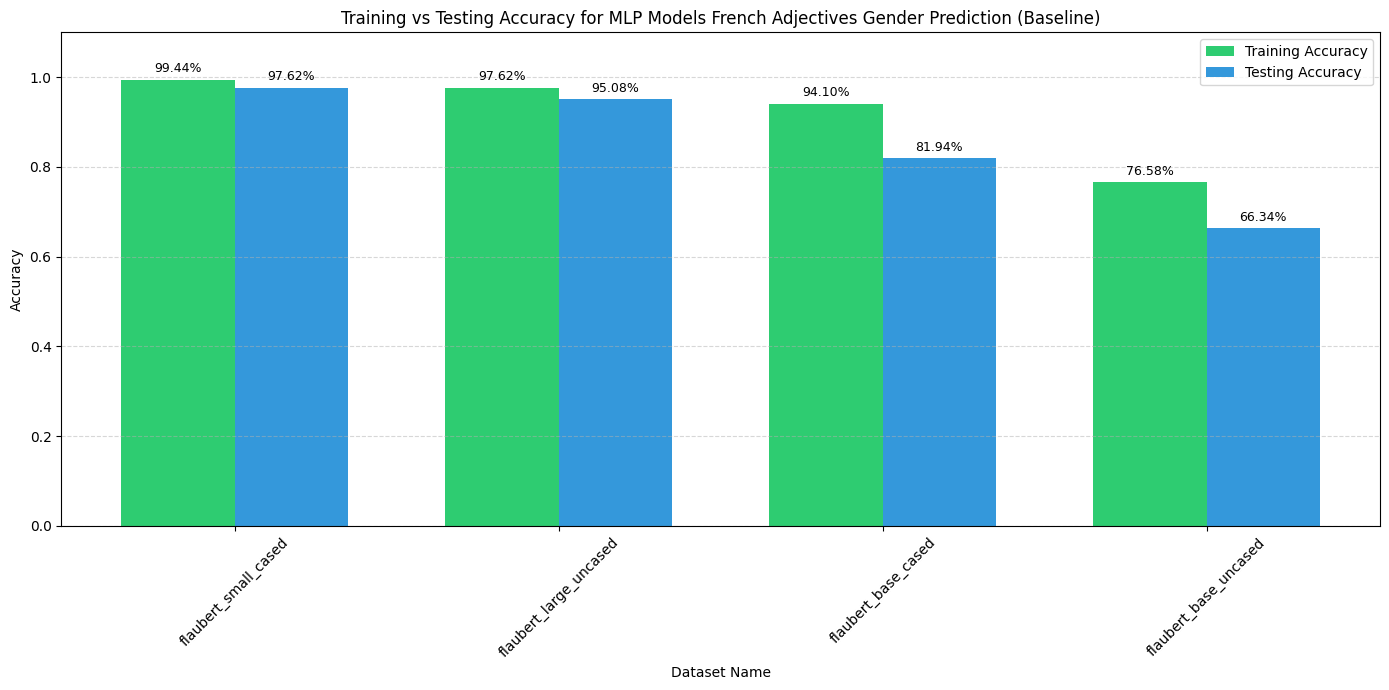

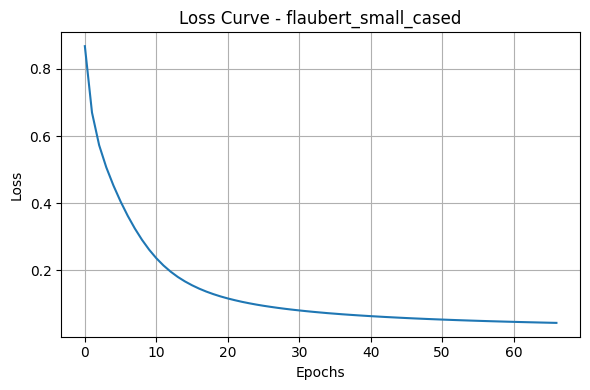

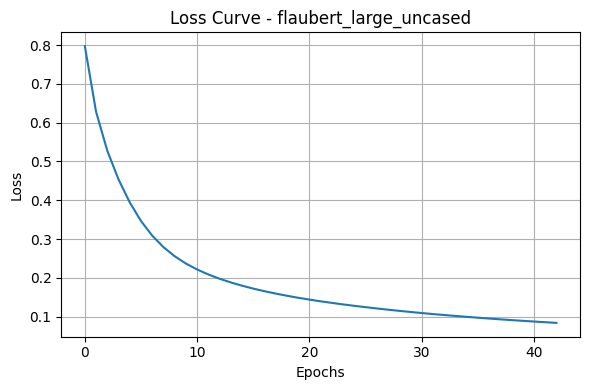

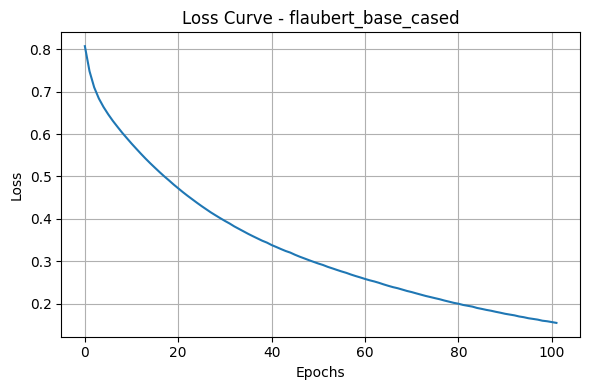

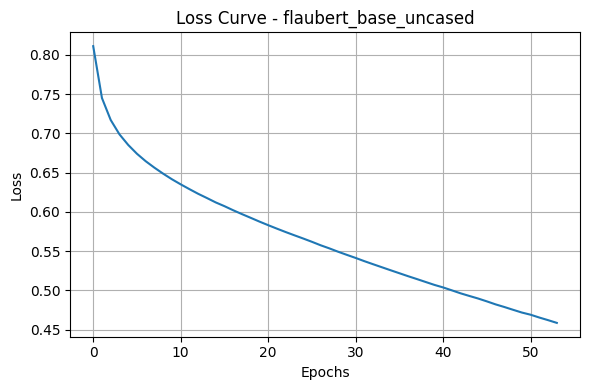

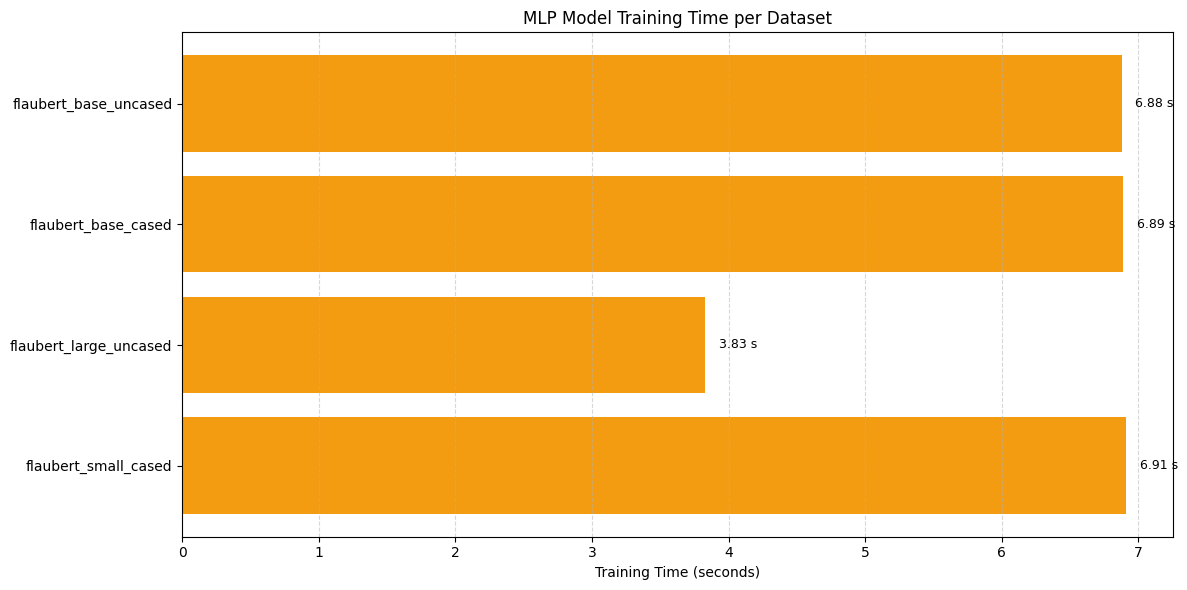

In [7]:
# Sort models by test accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
model_names, test_accs = zip(*sorted_models)
train_accs = [training_accuracies[name] for name in model_names]

# Accuracy Bar Chart
import matplotlib.pyplot as plt

x = range(len(model_names))
bar_width = 0.35

plt.figure(figsize=(14, 7))
plt.bar(x, train_accs, width=bar_width, label='Training Accuracy', color='#2ecc71')
plt.bar([i + bar_width for i in x], test_accs, width=bar_width, label='Testing Accuracy', color='#3498db')

for i, (train, test) in enumerate(zip(train_accs, test_accs)):
    plt.text(i, train + 0.01, f"{train:.2%}", ha='center', va='bottom', fontsize=9)
    plt.text(i + bar_width, test + 0.01, f"{test:.2%}", ha='center', va='bottom', fontsize=9)

plt.xlabel("Dataset Name")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy for MLP Models French Adjectives Gender Prediction (Baseline)")
plt.xticks([i + bar_width / 2 for i in x], model_names, rotation=45)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Plot loss curves
for name in model_names:
    if loss_curves.get(name):
        plt.figure(figsize=(6, 4))
        plt.plot(loss_curves[name])
        plt.title(f"Loss Curve - {name}")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Plot training times
times = [training_times[name] for name in model_names]

plt.figure(figsize=(12, 6))
plt.barh(model_names, times, color="#f39c12")
for i, t in enumerate(times):
    plt.text(t + 0.1, i, f"{t:.2f} s", va="center", fontsize=9)
plt.xlabel("Training Time (seconds)")
plt.title("MLP Model Training Time per Dataset")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# Step 4) Applying SHAP to Understand Global Features Importance


--- Processing SHAP Feature Importance for flaubert_base_cased ---


PermutationExplainer explainer: 2698it [3:14:57,  4.34s/it]                               



--- SHAP Feature Importance Plot for flaubert_base_cased ---


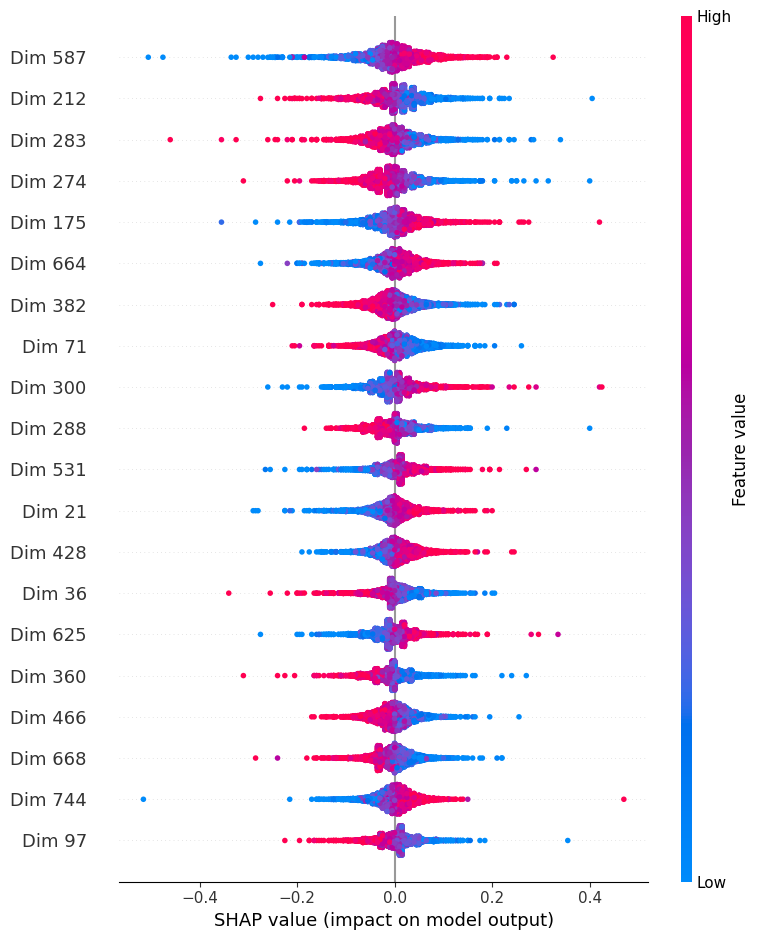


--- Processing SHAP Feature Importance for flaubert_base_uncased ---


PermutationExplainer explainer: 3302it [2:04:41,  2.27s/it]                            



--- SHAP Feature Importance Plot for flaubert_base_uncased ---


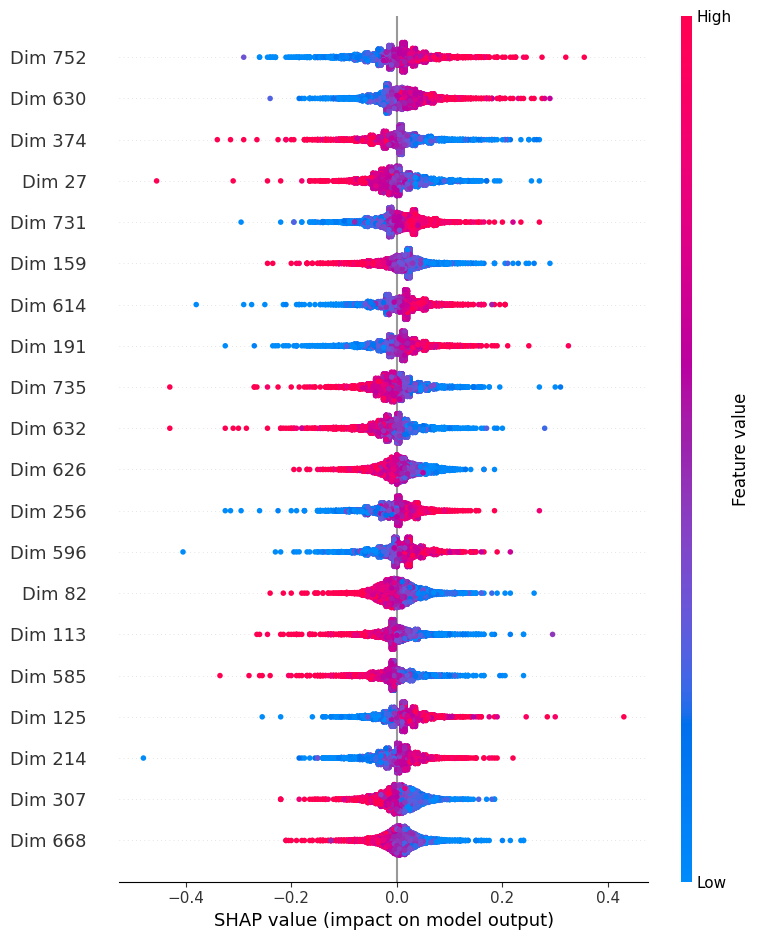


--- Processing SHAP Feature Importance for flaubert_large_uncased ---


PermutationExplainer explainer: 2698it [3:18:20,  4.42s/it]                            



--- SHAP Feature Importance Plot for flaubert_large_uncased ---


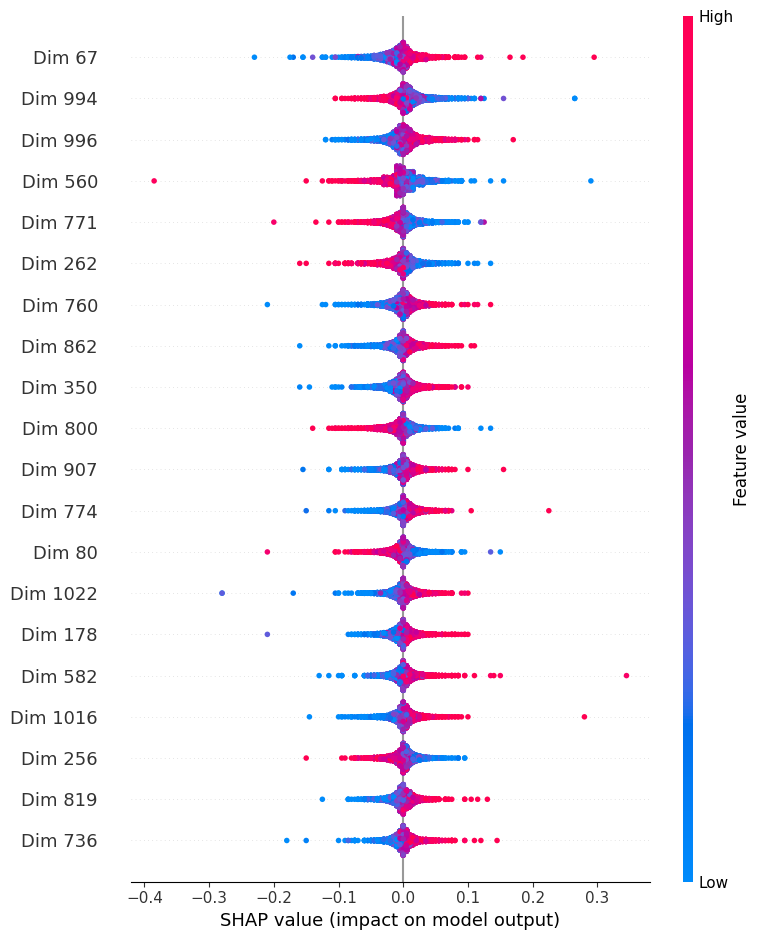


--- Processing SHAP Feature Importance for flaubert_small_cased ---


PermutationExplainer explainer: 2698it [44:46,  1.00it/s]                          



--- SHAP Feature Importance Plot for flaubert_small_cased ---


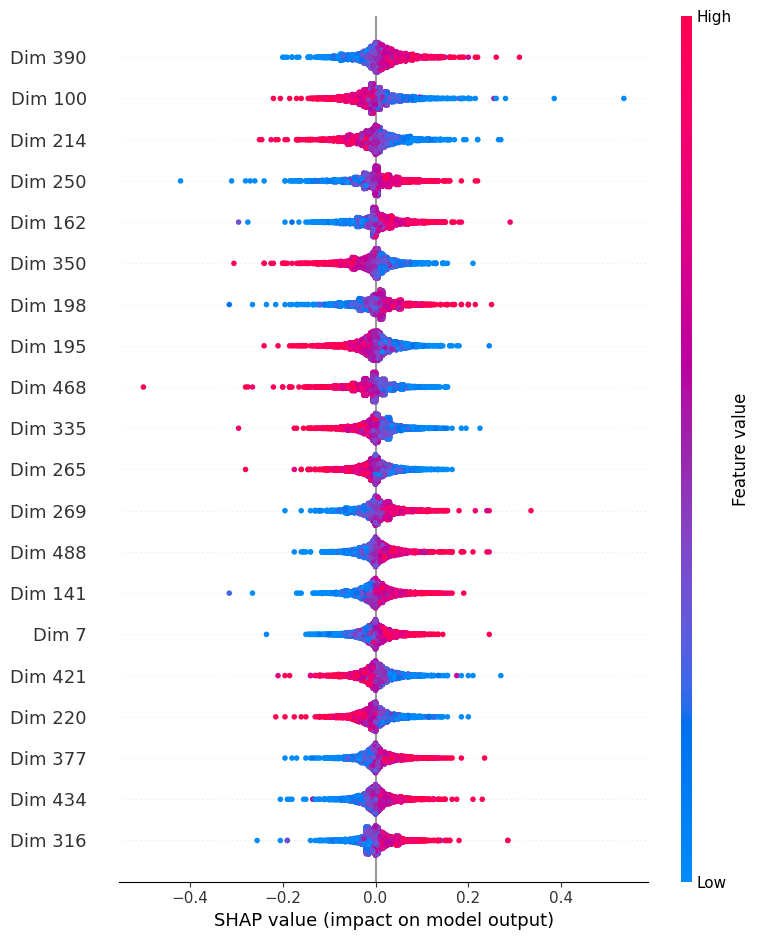

In [ ]:
import shap
import numpy as np

# Dictionary to store feature importance for each model
shap_feature_dict = {}

# Loop through trained models and apply SHAP
for name in trained_models.keys():
    print(f"\n--- Processing SHAP Feature Importance for {name} ---")

    # Retrieve stored X_test for the model
    X_test = test_data[name]  # Use the stored test dataset
    perceptron = trained_models[name]  # Use the already trained model

    # Get embedding dimension length dynamically
    embedding_dim = X_test.shape[1]

    # Apply SHAP
    explainer = shap.Explainer(perceptron.predict, X_test)
    shap_values = explainer(X_test, max_evals=embedding_dim * 2 + 1)

    # Compute mean absolute SHAP values per feature
    mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

    # Store feature importance for this model
    shap_feature_dict[name] = mean_abs_shap_values

    # Plot SHAP summary for this model
    print(f"\n--- SHAP Feature Importance Plot for {name} ---")
    shap.summary_plot(shap_values, X_test, feature_names=[f"Dim {i}" for i in range(embedding_dim)])


### 4.1 Saving SHAP Feature Importance Results

In [ ]:
import pandas as pd
import numpy as np

# Find the maximum embedding dimension across all models
max_embedding_dim = max(len(v) for v in shap_feature_dict.values())

# Ensure all feature importance arrays have the same length by padding with NaN
for model in shap_feature_dict.keys():
    current_length = len(shap_feature_dict[model])
    if current_length < max_embedding_dim:
        shap_feature_dict[model] = np.pad(
            shap_feature_dict[model], (0, max_embedding_dim - current_length), constant_values=np.nan
        )

# Convert SHAP results into a single DataFrame
shap_feature_importance_all = pd.DataFrame(shap_feature_dict)

# Add feature column names
shap_feature_importance_all.insert(0, "Feature", [f"Dim {i}" for i in range(max_embedding_dim)])

# Sort by highest importance (mean across all models)
shap_feature_importance_all["Mean Importance"] = shap_feature_importance_all.iloc[:, 1:].mean(axis=1)
shap_feature_importance_all = shap_feature_importance_all.sort_values(by="Mean Importance", ascending=False)

# Save to a single CSV file
csv_filename = "mlp_adjectives_shap_feature_importance_all_models.csv"
shap_feature_importance_all.to_csv(csv_filename, index=False)
print(f"\n--- SHAP feature importance saved to {csv_filename} ---")

# Display the table
print("\n--- SHAP Feature Importance Table (Top 50 Features) ---")
display(shap_feature_importance_all.head(50))  # Show the top 50 most important features


NameError: name 'shap_feature_dict' is not defined

# Step 5) Retrain Perceptron Using Selected SHAP Dimensions

### 5.1 Select Top N% (1, 2, 4, ... n) Features from SHAP Importance

In [21]:
import pandas as pd
import numpy as np

# Load the SHAP feature importance results
shap_feature_importance_all = pd.read_csv("mlp_adjectives_shap_feature_importance_all_models.csv")

# Dictionary to store selected feature sets for each MLP model
top_features_dict = {}

# Define top SHAP feature selection percentages
percentages = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26]

# Loop through each model's SHAP importance values
for model_name in shap_feature_importance_all.columns[1:-1]:  # Exclude 'Feature' and 'Mean Importance'
    print(f"\n--- Selecting Top SHAP Features for MLP Model: {model_name} ---")

    # Get the total number of features available
    total_features = len(shap_feature_importance_all)

    # Sort feature importance values in descending order
    sorted_features = shap_feature_importance_all[["Feature", model_name]].sort_values(by=model_name, ascending=False)

    # Store top feature sets for different SHAP value thresholds
    top_features_dict[model_name] = {}

    for percent in percentages:
        num_features = int((percent / 100) * total_features)
        selected_features = sorted_features["Feature"].head(num_features).tolist()
        top_features_dict[model_name][percent] = selected_features

print("\n--- SHAP-based Feature Selection for MLP Models Completed ---")



--- Selecting Top SHAP Features for MLP Model: flaubert_base_cased ---

--- Selecting Top SHAP Features for MLP Model: flaubert_base_uncased ---

--- Selecting Top SHAP Features for MLP Model: flaubert_large_uncased ---

--- Selecting Top SHAP Features for MLP Model: flaubert_small_cased ---

--- SHAP-based Feature Selection for MLP Models Completed ---


### 5.2 Retrain MLP Using Top N% SHAP Features

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionaries to store new model performance (SHAP-selected feature retraining)
new_model_accuracies = {}         # To store test accuracies
new_model_training_accuracies = {}  # <-- for training accuracies
new_trained_models = {}           # To store retrained models
new_test_data = {}                # To store test set splits
new_loss_curves = {}              # To store loss curves
new_training_times = {}           # To store training times

# Loop through each model and retrain using selected features
for model_name, feature_sets in top_features_dict.items():
    print(f"\n--- Retraining MLP for {model_name} ---")

    # Retrieve original dataset
    df = dataframes[model_name]

    # Ensure dataset has "Gender" and "Word" columns
    if "Gender" not in df.columns or "Word" not in df.columns:
        print(f"Skipping {model_name} (Missing required columns)")
        continue

    # Extract full feature set
    X_full = df.drop(columns=["Word", "Gender"])
    y = df["Gender"]

    # Ensure dataset column names are strings
    X_full.columns = X_full.columns.astype(str)

    for percent, selected_features in feature_sets.items():
        print(f"\n--- Training with Top {percent}% Features ---")

        # Convert SHAP-selected feature names (e.g., "Dim 302") to corresponding dataset column names
        selected_indices = [int(feature.split(" ")[1]) for feature in selected_features]
        selected_columns = [str(idx) for idx in selected_indices]  # Convert to string to match column names

        # Filter dataset to keep only selected dimensions
        X_selected = X_full[selected_columns].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_selected, y, test_size=0.2, random_state=42, stratify=y
        )

        # Standardize embeddings
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize MLP model using the updated baseline architecture
        mlp = MLPClassifier(
            hidden_layer_sizes=(32, 16),
            max_iter=300,
            solver='sgd',
            learning_rate_init=0.001,
            early_stopping=True,
            validation_fraction=0.1,
            n_iter_no_change=10,
            alpha=0.1,
            random_state=42,
        )

        start_time = time.time()
        mlp.fit(X_train_scaled, y_train)
        elapsed = time.time() - start_time
        new_training_times[(model_name, percent)] = elapsed

        # Store model, test data, and loss curves
        new_trained_models[(model_name, percent)] = mlp
        new_test_data[(model_name, percent)] = (X_test_scaled, y_test)
        new_loss_curves[(model_name, percent)] = mlp.loss_curve_ if hasattr(mlp, 'loss_curve_') else None

        # Evaluate
        train_acc = accuracy_score(y_train, mlp.predict(X_train_scaled))
        test_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
        new_model_training_accuracies[(model_name, percent)] = train_acc  # <-- Save training accuracy
        new_model_accuracies[(model_name, percent)] = test_acc

        print(f"\nTraining Accuracy: {train_acc:.4f}")
        print(f"Testing Accuracy: {test_acc:.4f}")
        print(f"Training Time: {elapsed:.2f} seconds")
        print(classification_report(y_test, mlp.predict(X_test_scaled), target_names=["Feminine (0)", "Masculine (1)"]))

print("\n--- Retraining Completed ---")



--- Retraining MLP for flaubert_base_cased ---

--- Training with Top 1% Features ---

Training Accuracy: 0.5862
Testing Accuracy: 0.5796
Training Time: 0.75 seconds
               precision    recall  f1-score   support

 Feminine (0)       0.44      0.12      0.19       529
Masculine (1)       0.60      0.89      0.72       772

     accuracy                           0.58      1301
    macro avg       0.52      0.51      0.45      1301
 weighted avg       0.53      0.58      0.50      1301


--- Training with Top 2% Features ---

Training Accuracy: 0.6071
Testing Accuracy: 0.5796
Training Time: 0.78 seconds
               precision    recall  f1-score   support

 Feminine (0)       0.45      0.15      0.22       529
Masculine (1)       0.60      0.87      0.71       772

     accuracy                           0.58      1301
    macro avg       0.52      0.51      0.47      1301
 weighted avg       0.54      0.58      0.51      1301


--- Training with Top 4% Features ---

Training

###5.3  Evaluation for Retrained Models

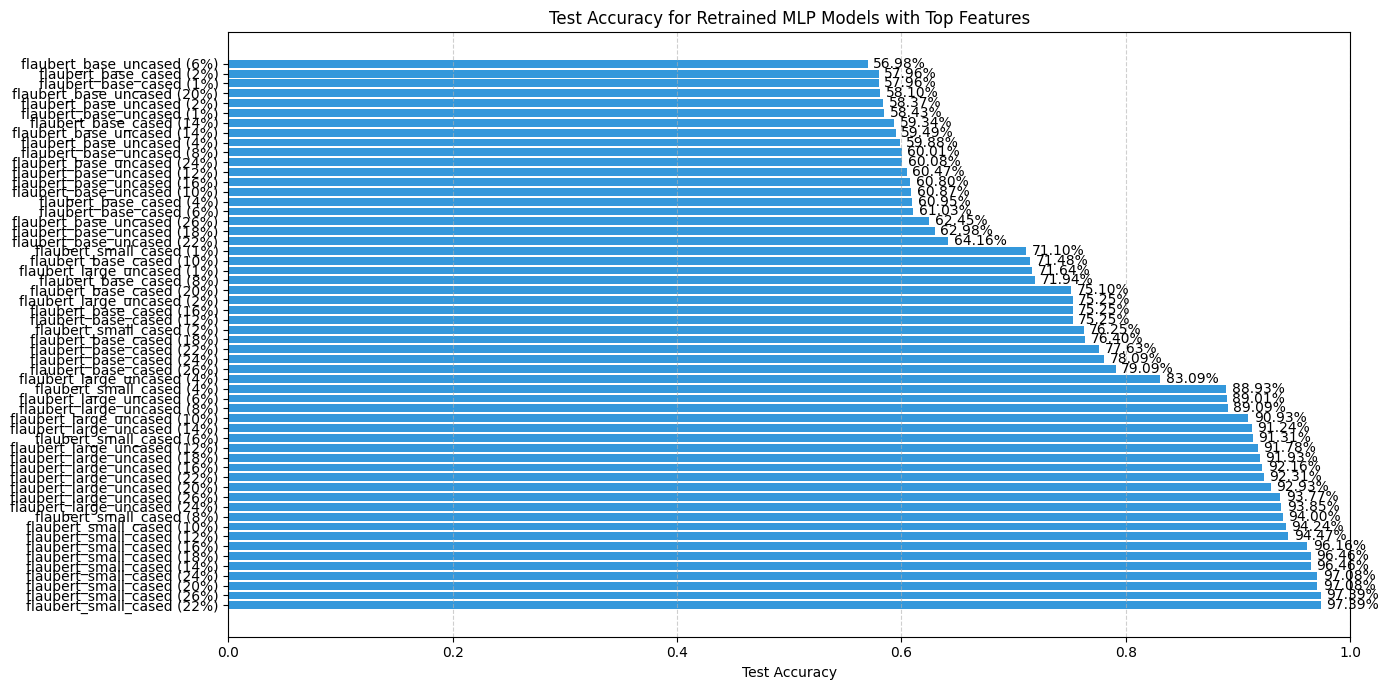

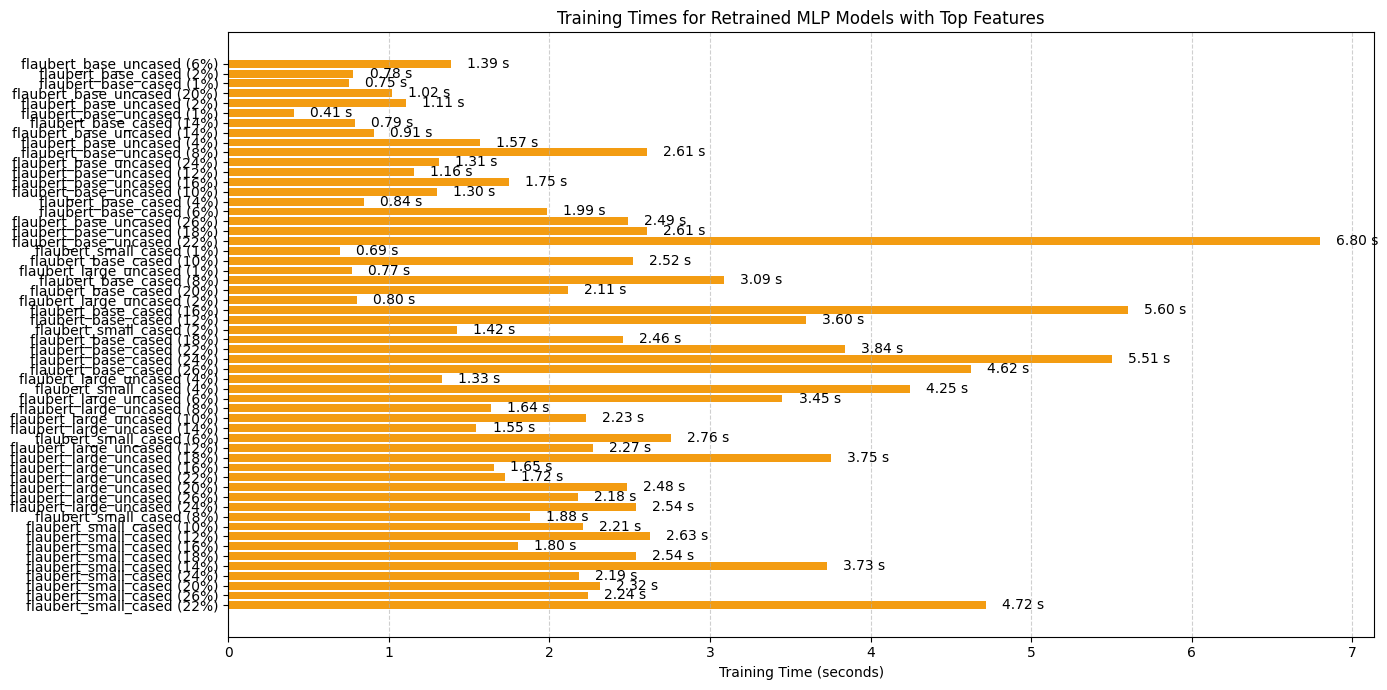

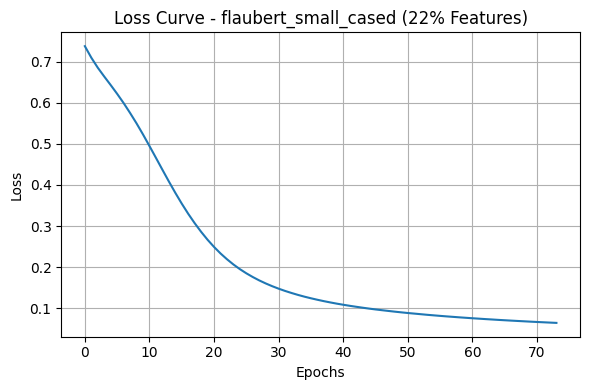

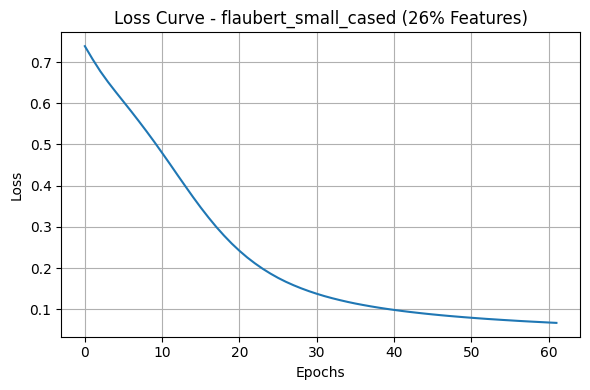

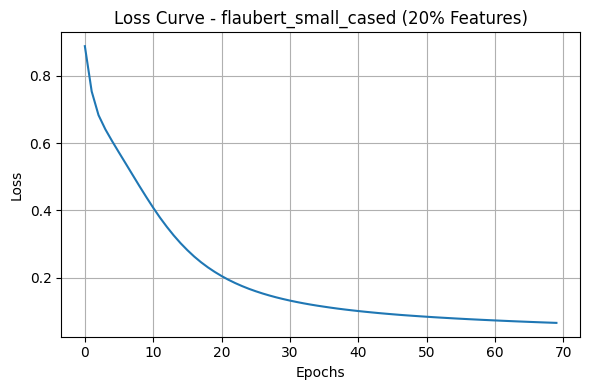

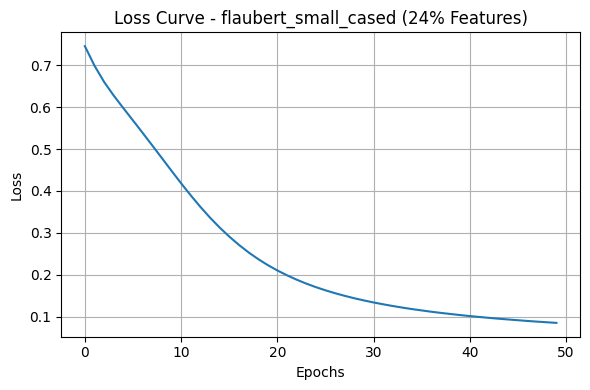

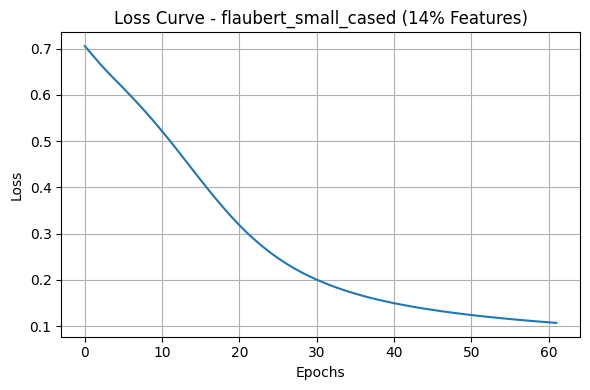

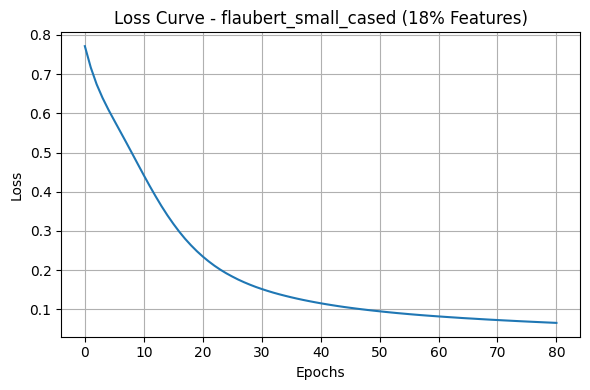

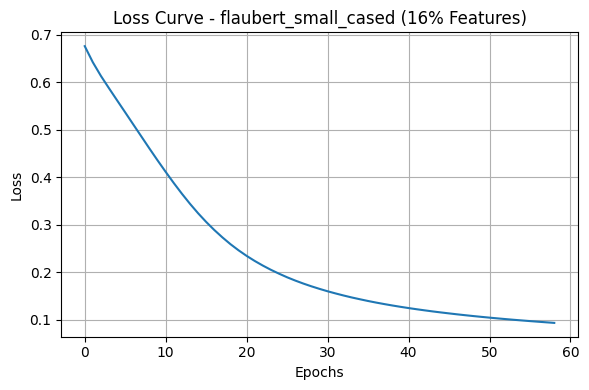

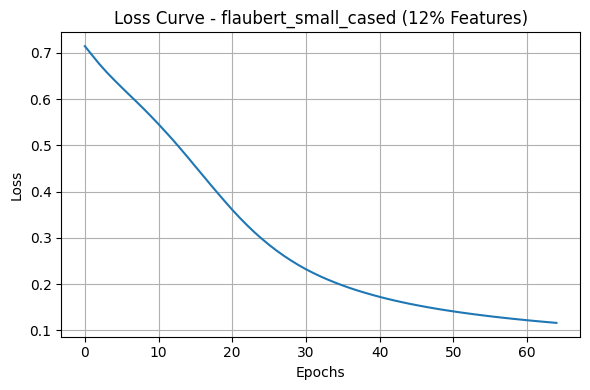

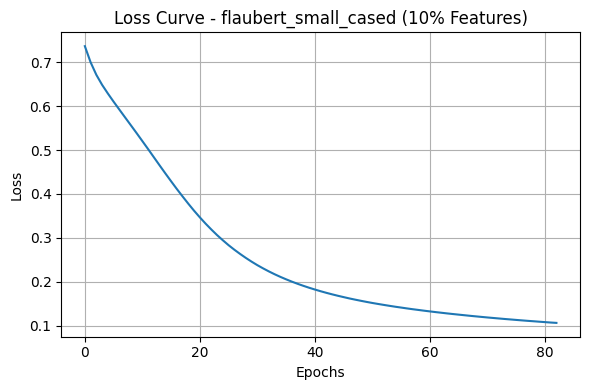

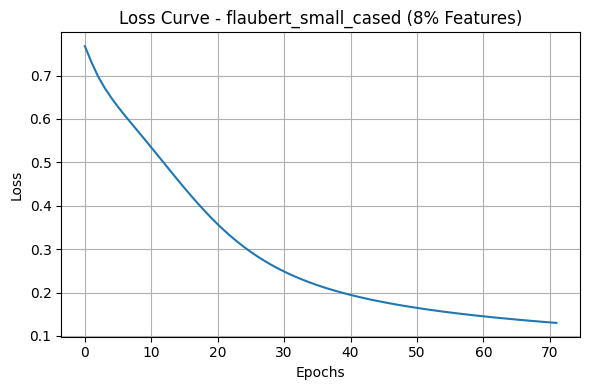

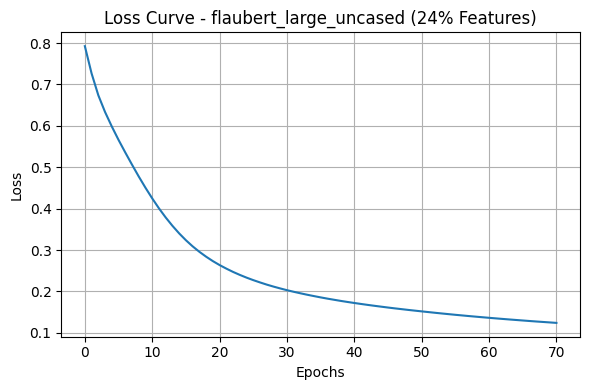

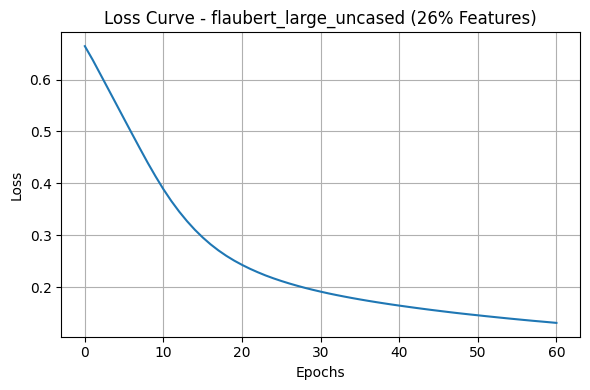

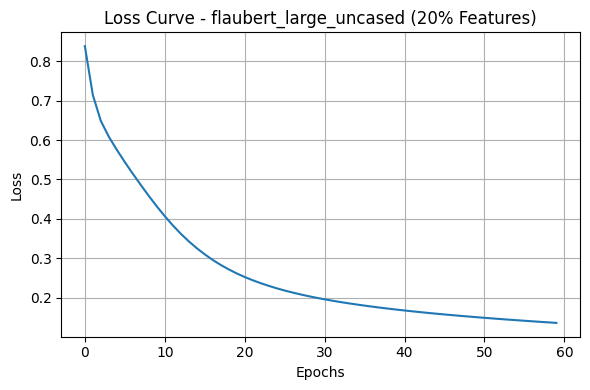

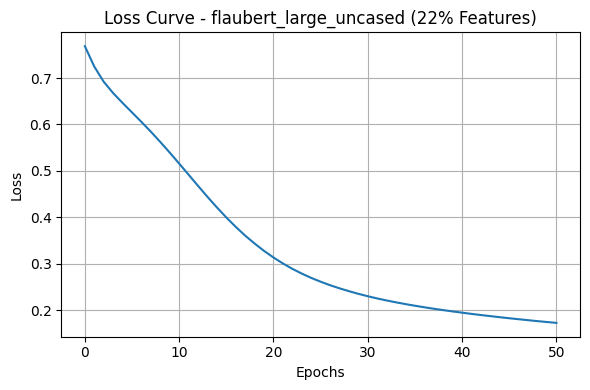

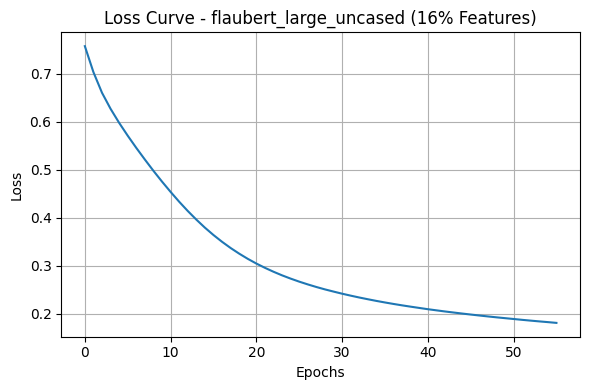

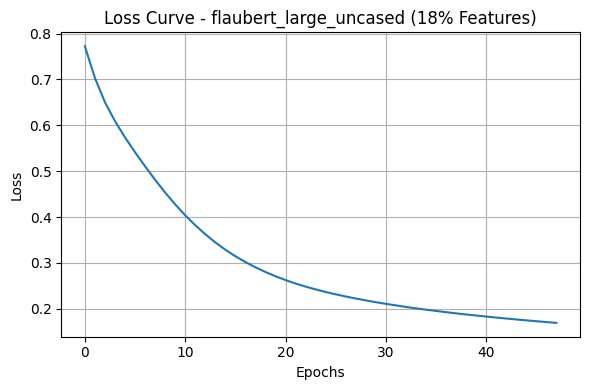

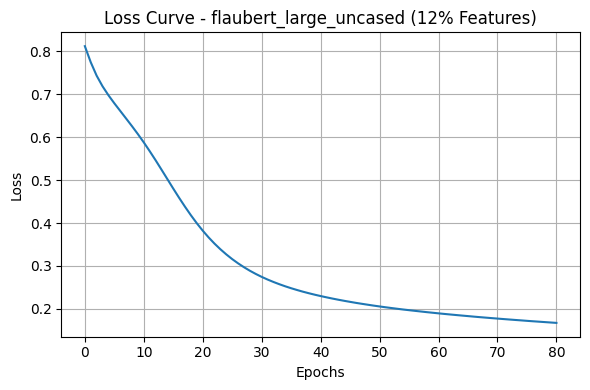

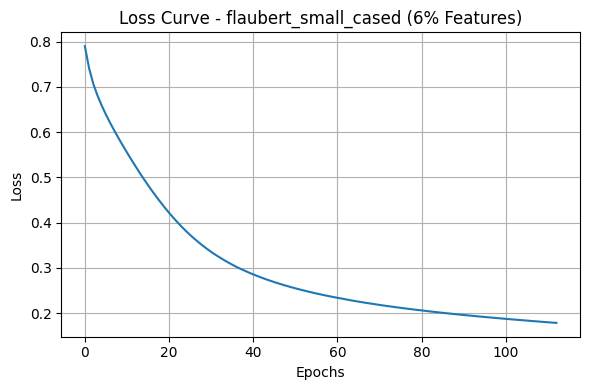

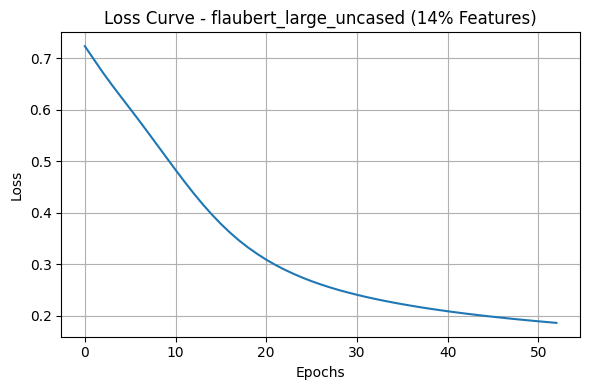

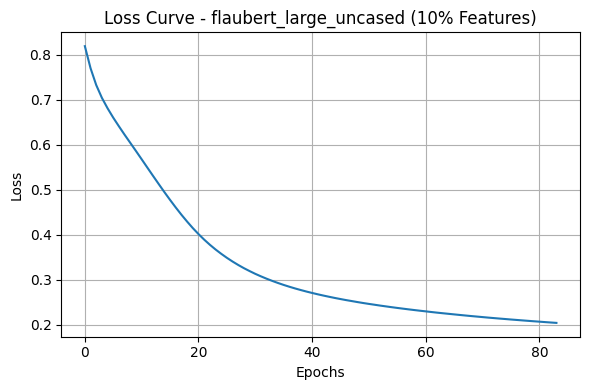

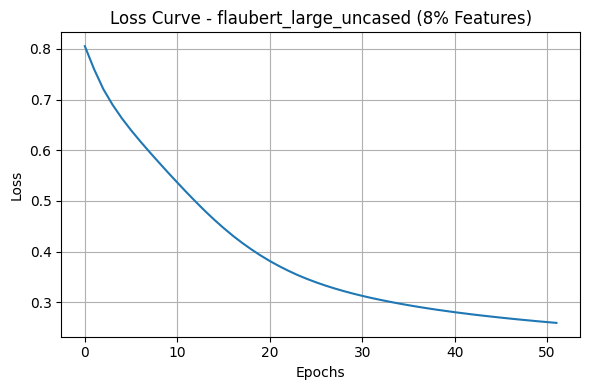

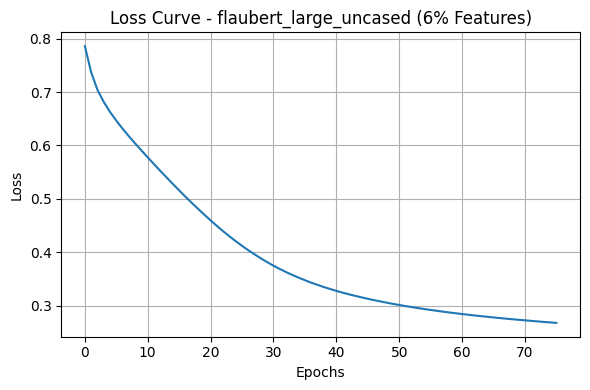

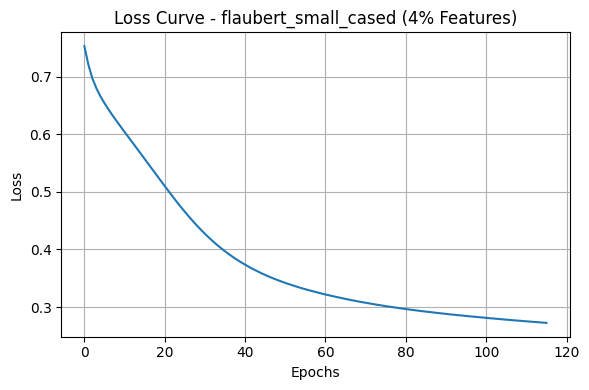

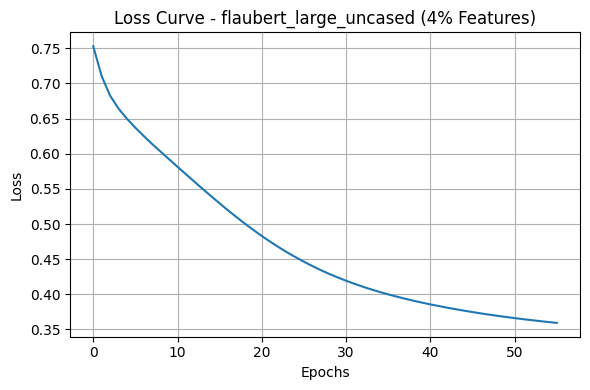

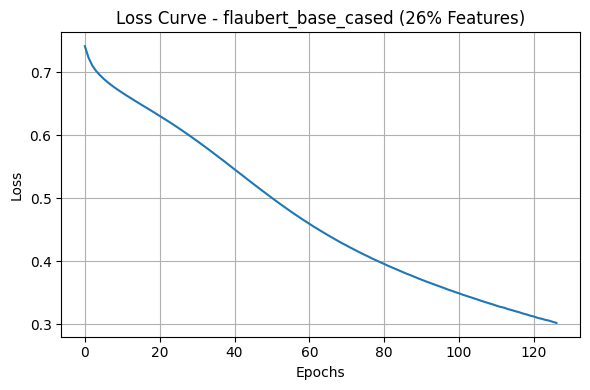

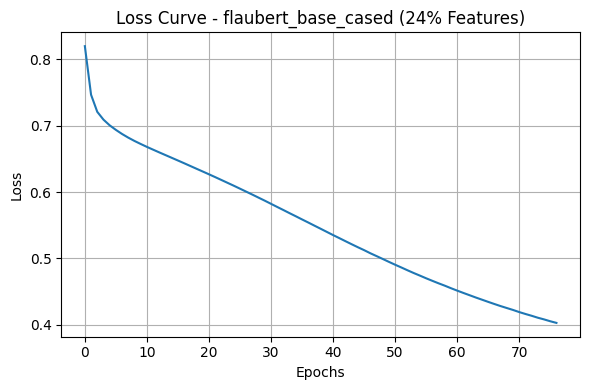

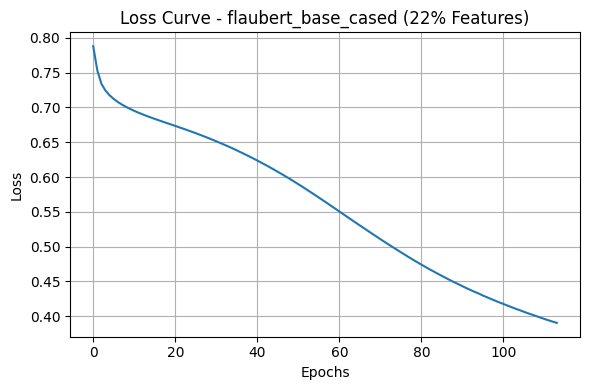

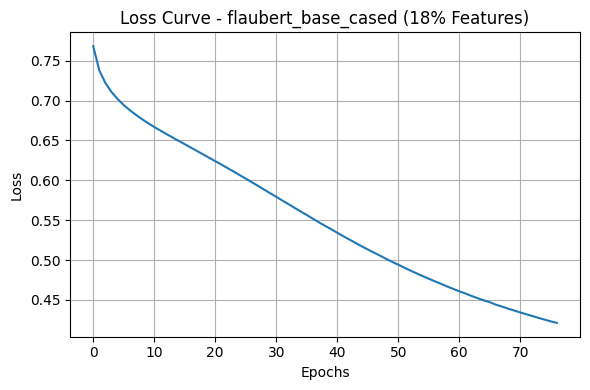

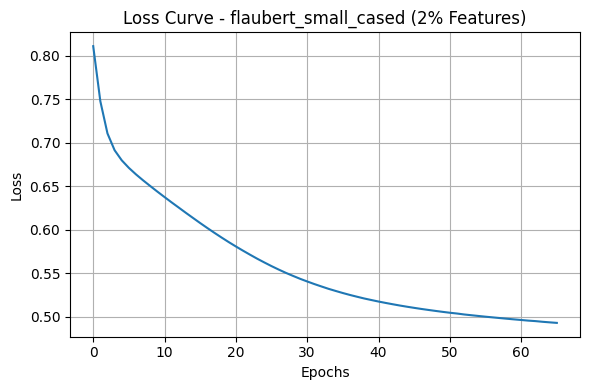

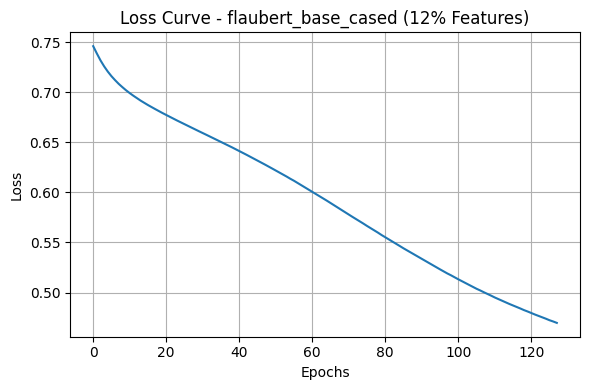

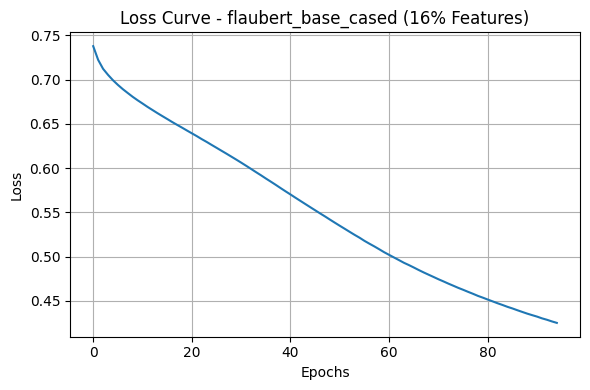

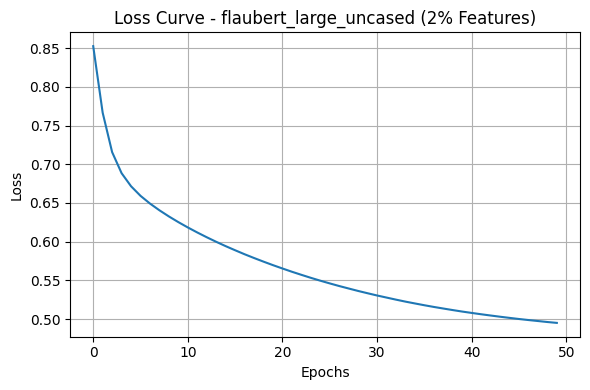

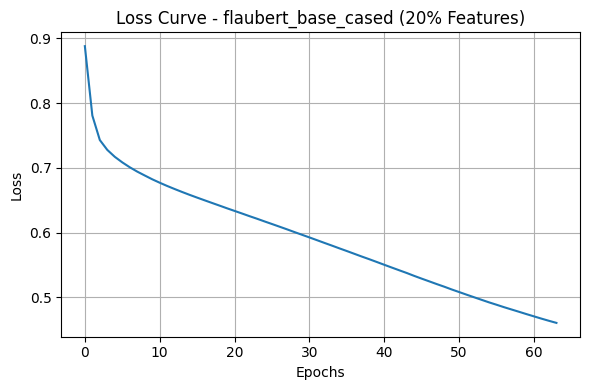

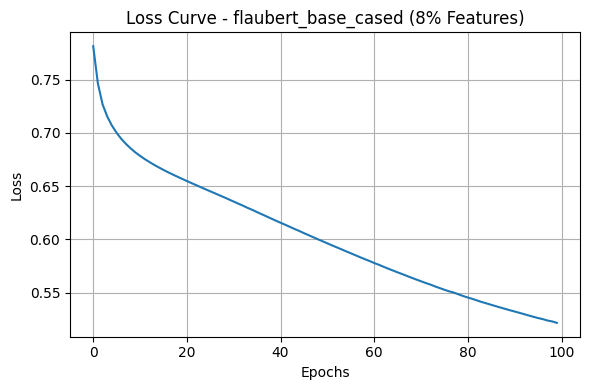

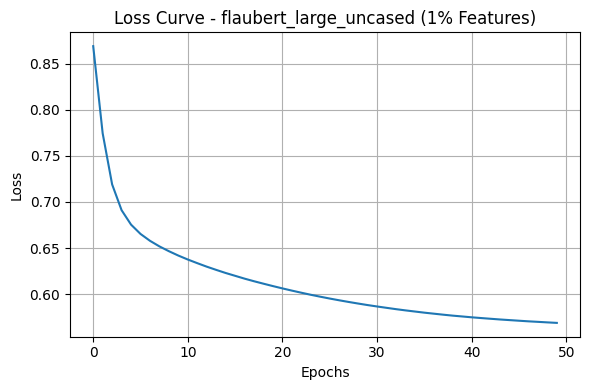

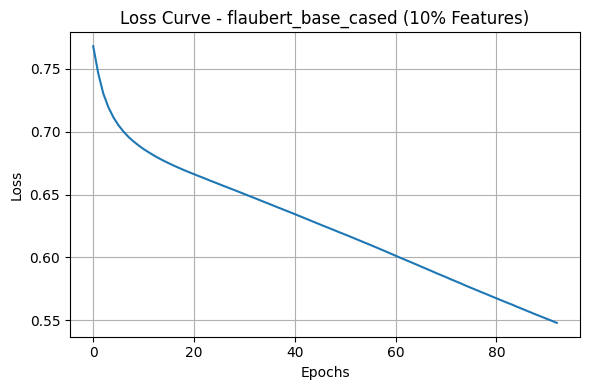

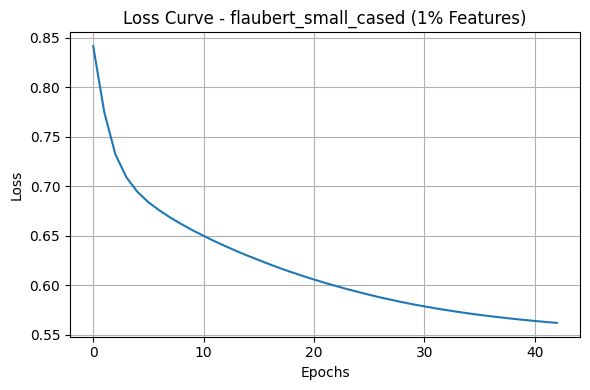

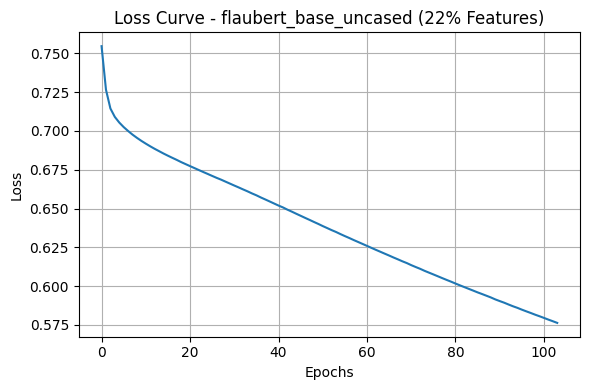

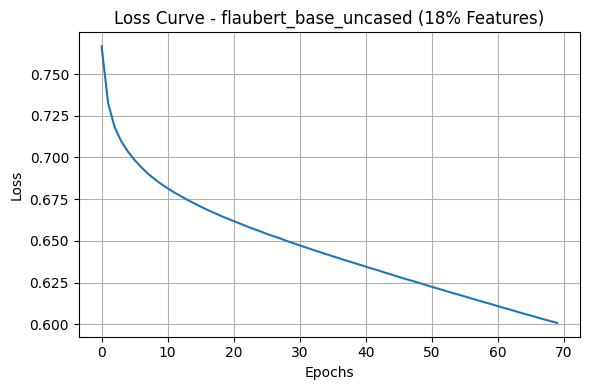

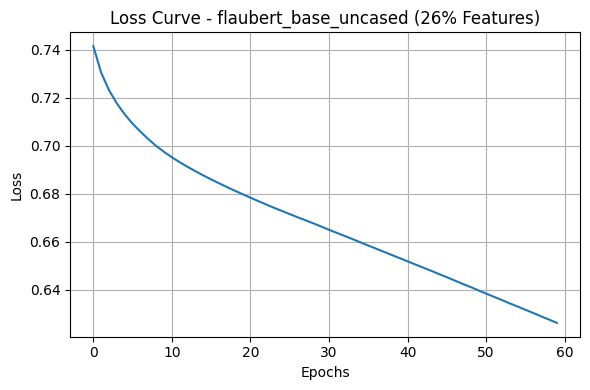

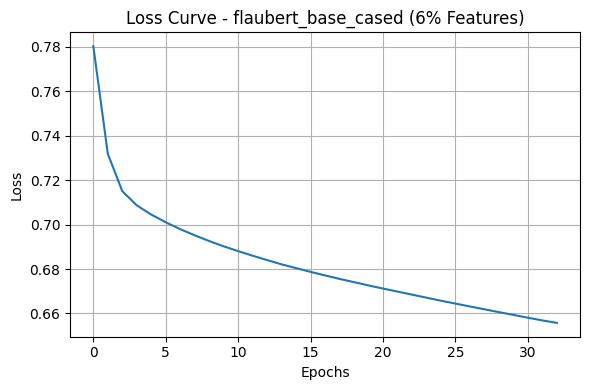

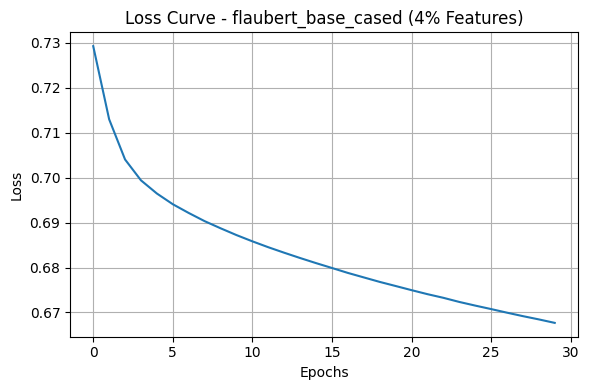

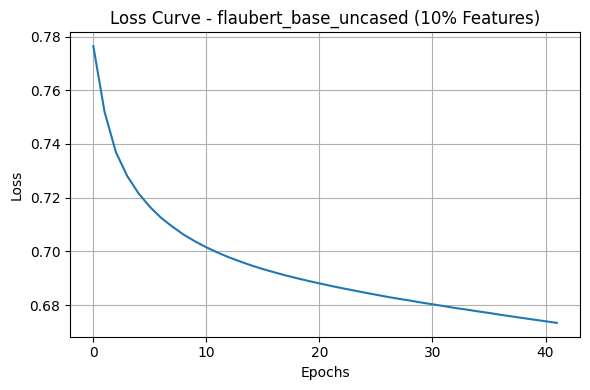

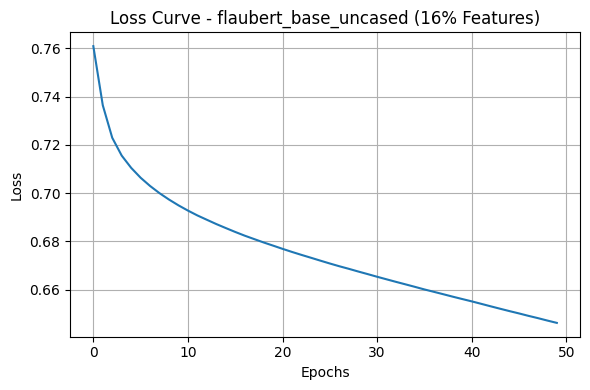

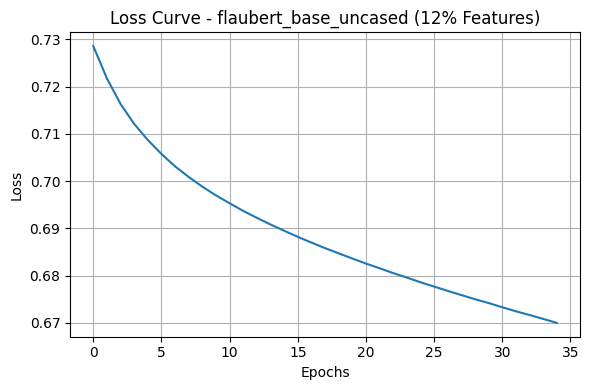

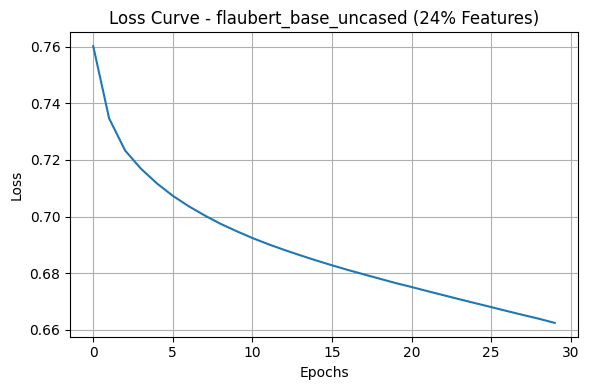

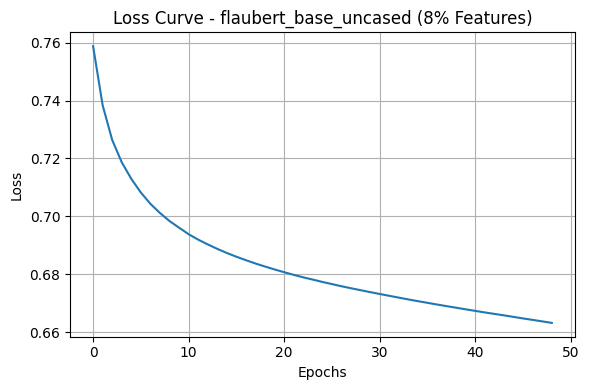

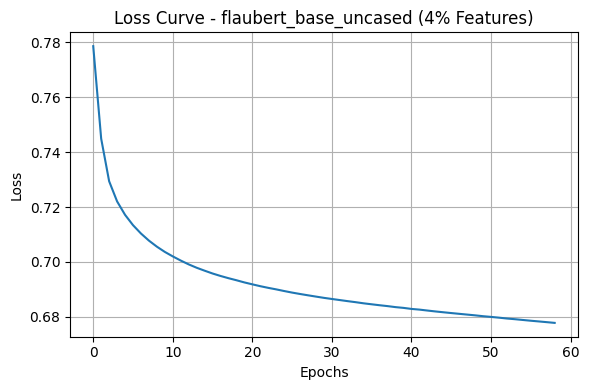

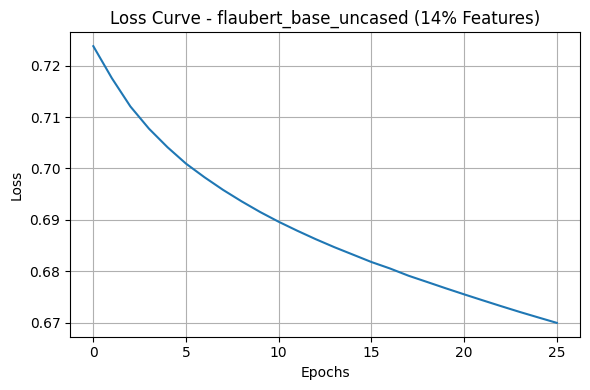

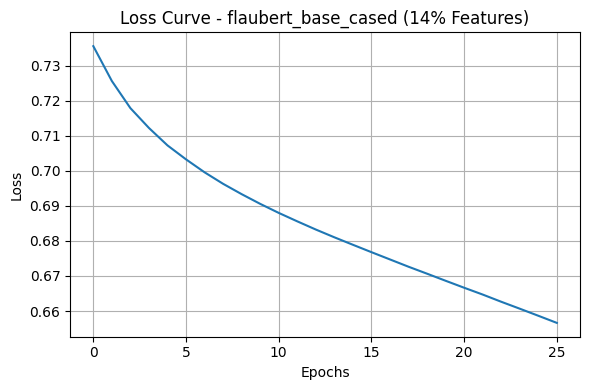

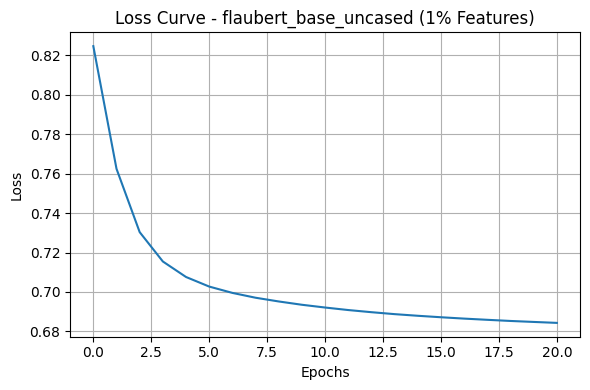

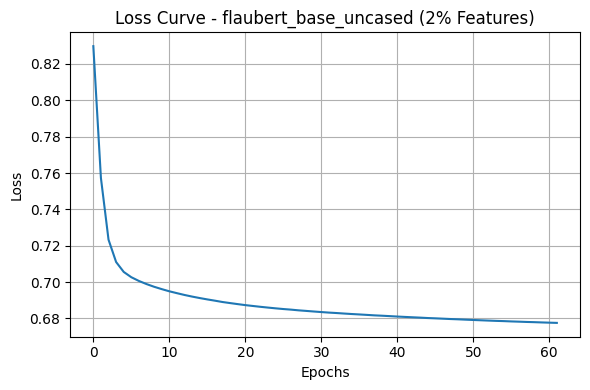

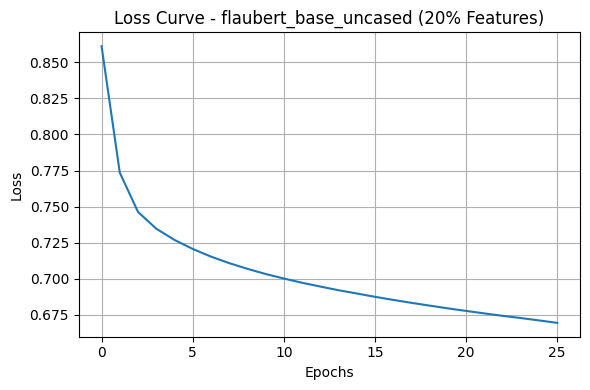

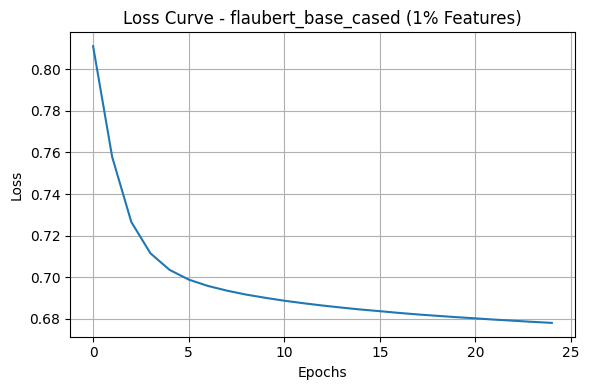

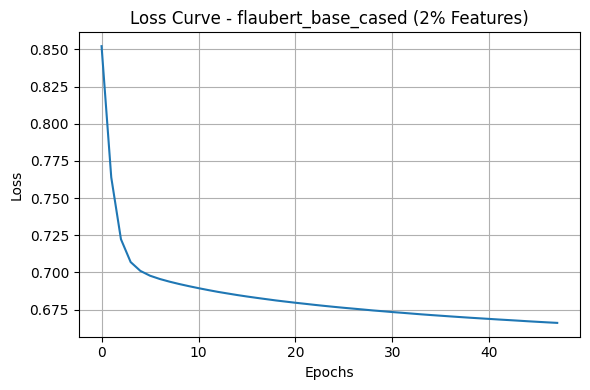

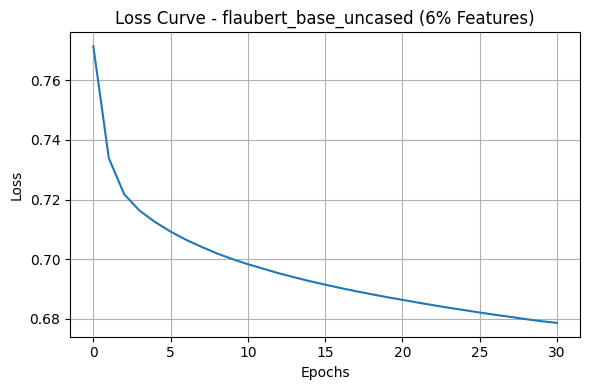

In [23]:
import matplotlib.pyplot as plt

# Extract sorted model names and accuracies for visualization (sorted by test accuracy)
sorted_results = sorted(new_model_accuracies.items(), key=lambda x: x[1], reverse=True)
model_ids, accuracies = zip(*sorted_results)
model_labels = [f"{model} ({percent}%)" for (model, percent) in model_ids]

# Plot Bar Chart for Test Accuracies
plt.figure(figsize=(14, 7))
bars = plt.barh(model_labels, accuracies, color="#3498db")
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.005, i, f"{acc:.2%}", va="center", fontsize=10)
plt.xlabel("Test Accuracy")
plt.title("Test Accuracy for Retrained MLP Models with Top Features")
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Plot Training Times
training_times_sorted = [new_training_times[mid] for mid in model_ids]
plt.figure(figsize=(14, 7))
bars = plt.barh(model_labels, training_times_sorted, color="#f39c12")
for i, t in enumerate(training_times_sorted):
    plt.text(t + 0.1, i, f"{t:.2f} s", va="center", fontsize=10)
plt.xlabel("Training Time (seconds)")
plt.title("Training Times for Retrained MLP Models with Top Features")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Plot Loss Curves for each retrained model if available
for mid in model_ids:
    loss_curve = new_loss_curves.get(mid)
    if loss_curve is not None:
        plt.figure(figsize=(6, 4))
        plt.plot(loss_curve)
        plt.title(f"Loss Curve - {mid[0]} ({mid[1]}% Features)")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


#Step 6) Compare Performance of Baseline MLP vs SHAP %N High Importance Features

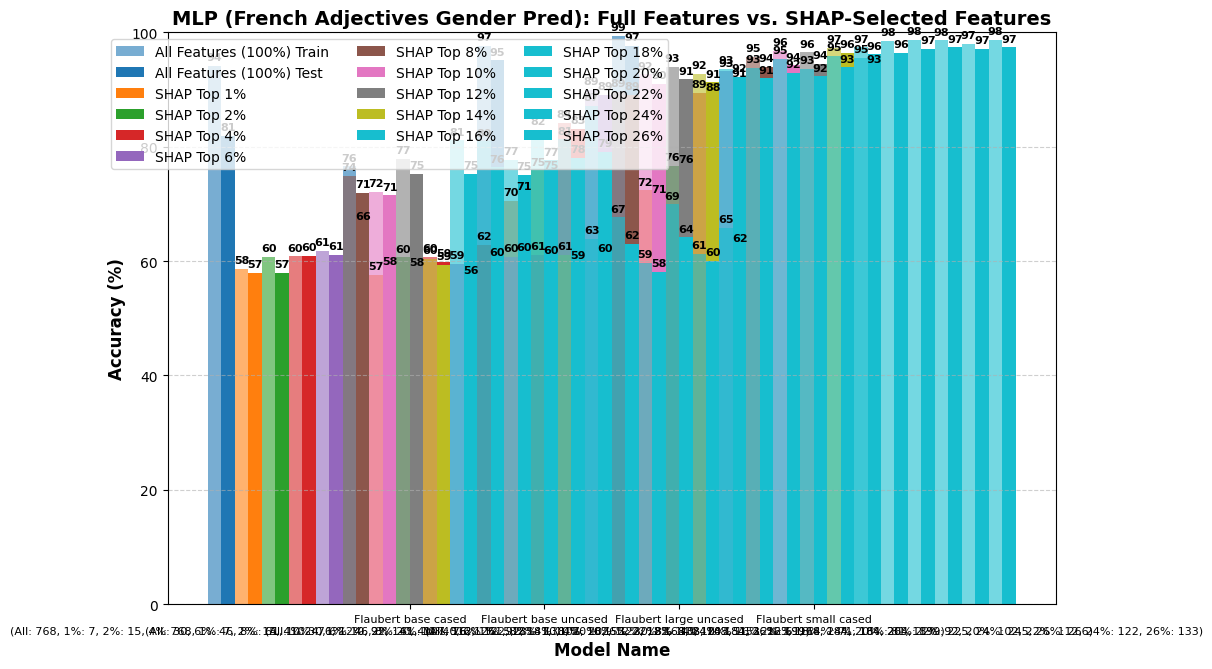

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# Convert baseline model accuracies to percentages
baseline_test_accuracies = {name: model_accuracies[name] * 100 for name in trained_models.keys()}
baseline_train_accuracies = {name: training_accuracies[name] * 100 for name in trained_models.keys()}

# Compute each model's valid feature count from the SHAP CSV (non-NaN values)
model_valid_counts = {}
for model in baseline_test_accuracies.keys():
    if model in shap_feature_importance_all.columns:
        model_valid_counts[model] = shap_feature_importance_all[model].notnull().sum()
    else:
        # Fallback: if the model's column isn't present, use the total row count
        model_valid_counts[model] = len(shap_feature_importance_all)

# Define group labels dynamically: first group is baseline ("All Features (100%)") followed by each SHAP percentage.
group_labels = ["All Features (100%)"] + [f"SHAP Top {p}%" for p in percentages]
num_groups = len(group_labels)

# Create figure with additional space for footer
fig, ax = plt.subplots(figsize=(12, 8))

# Parameters for grouped bars:
bar_total_width = 0.2    # total width allocated per group (each group gets two bars: train & test)
bar_width = bar_total_width / 2  # each individual bar's width
index = np.arange(len(baseline_test_accuracies))  # x-axis positions for models
model_names = list(baseline_test_accuracies.keys())

# Use a colormap (e.g., tab10) to select colors dynamically for each group.
cmap = plt.get_cmap("tab10")
colors = [cmap(i) for i in range(num_groups)]

# Calculate feature counts for footer labels
feature_counts = {}
for percent in percentages:
    counts = []
    for model in model_names:
        valid_count = model_valid_counts[model]
        expected_count = int((percent / 100) * valid_count)
        counts.append(expected_count)
    feature_counts[percent] = counts

# Loop over each group and plot two bars (training and testing) per model
for j, group in enumerate(group_labels):
    # Shift each group by j * bar_total_width from the original x positions.
    x_positions = index + j * bar_total_width

    # For the baseline group, use baseline dictionaries; for others, use new SHAP dictionaries.
    if j == 0:
        # Baseline group: All Features (100%)
        train_vals = [baseline_train_accuracies[model] for model in model_names]
        test_vals  = [baseline_test_accuracies[model] for model in model_names]
    else:
        # SHAP groups: extract values from the retrained dictionaries
        percent = percentages[j - 1]
        train_vals = [
            new_model_training_accuracies.get((model, percent), 0) * 100
            for model in model_names
        ]
        test_vals = [
            new_model_accuracies.get((model, percent), 0) * 100
            for model in model_names
        ]

    # Offset training bars to the left and testing bars to the right within each group.
    x_train = x_positions - bar_width / 2
    x_test  = x_positions + bar_width / 2

    # Plot training bars with lower opacity (alpha=0.6)
    ax.bar(x_train, train_vals, bar_width,
           label=(group + " Train") if j == 0 else None,  # label only once to avoid clutter
           color=colors[j], alpha=0.6)
    # Plot testing bars with full opacity
    ax.bar(x_test, test_vals, bar_width,
           label=(group + " Test") if j == 0 else group, color=colors[j])

    # Add text labels above each training bar
    for bar in ax.containers[-2]:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f"{int(bar.get_height())}", ha='center', fontsize=8, fontweight='bold')
    # Add text labels above each testing bar
    for bar in ax.containers[-1]:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f"{int(bar.get_height())}", ha='center', fontsize=8, fontweight='bold')

# Formatting the main plot
ax.set_xlabel("Model Name", fontsize=12, fontweight="bold")
ax.set_ylabel("Accuracy (%)", fontsize=12, fontweight="bold")
ax.set_title("MLP (French Adjectives Gender Pred): Full Features vs. SHAP-Selected Features",
             fontsize=14, fontweight="bold")

# Create x-tick labels with feature counts included
x_labels = []
for i, model in enumerate(model_names):
    # Format model name (replace underscores with spaces and capitalize)
    model_display = model.replace("_", " ").capitalize()
    feature_info = f"{model_display}\n(All: {model_valid_counts[model]}"
    for percent in percentages:
        feature_info += f", {percent}%: {feature_counts[percent][i]}"
    feature_info += ")"
    x_labels.append(feature_info)

# Center x-tick labels under the full group of bars.
total_group_width = num_groups * bar_total_width
ax.set_xticks(index + total_group_width / 2 - bar_total_width / 2)
ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=8)
ax.set_ylim(0, 100)
ax.grid(axis="y", linestyle="--", alpha=0.6)

# Place legend above the plot (horizontally arranged)
plt.legend(loc='upper center', bbox_to_anchor=(0.25, 1), ncol=min(3, num_groups), fontsize=10)
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.tight_layout(rect=[0, 0.05, 1, 0.90])
plt.show()


Separate Comparison Visuals per Model

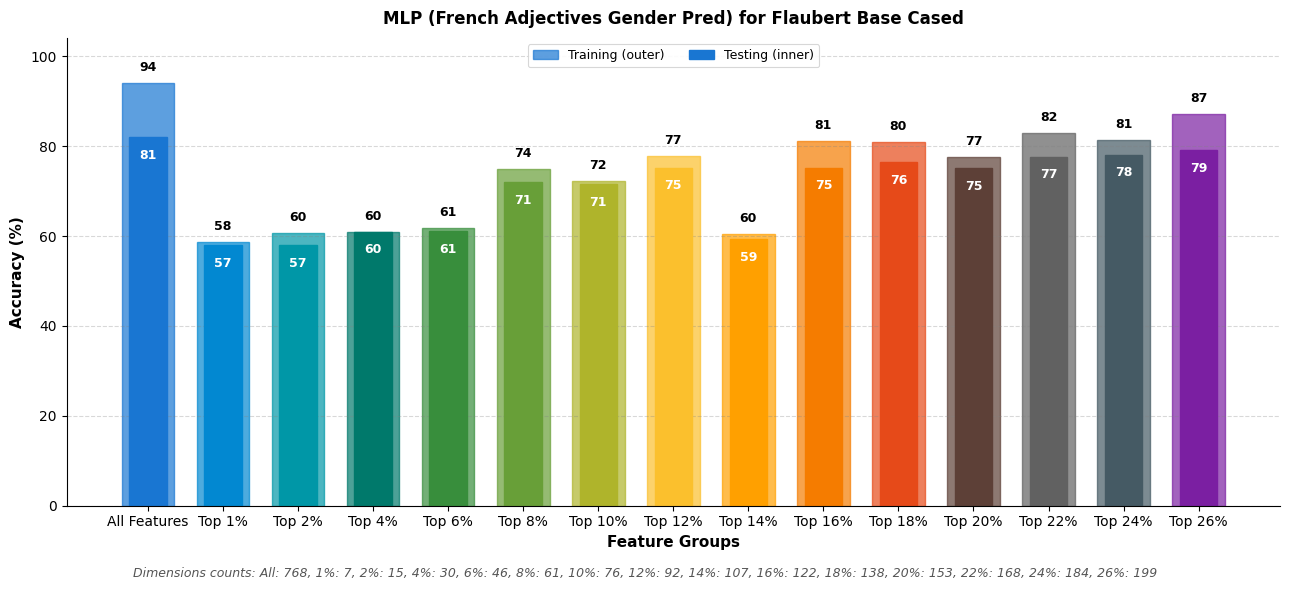

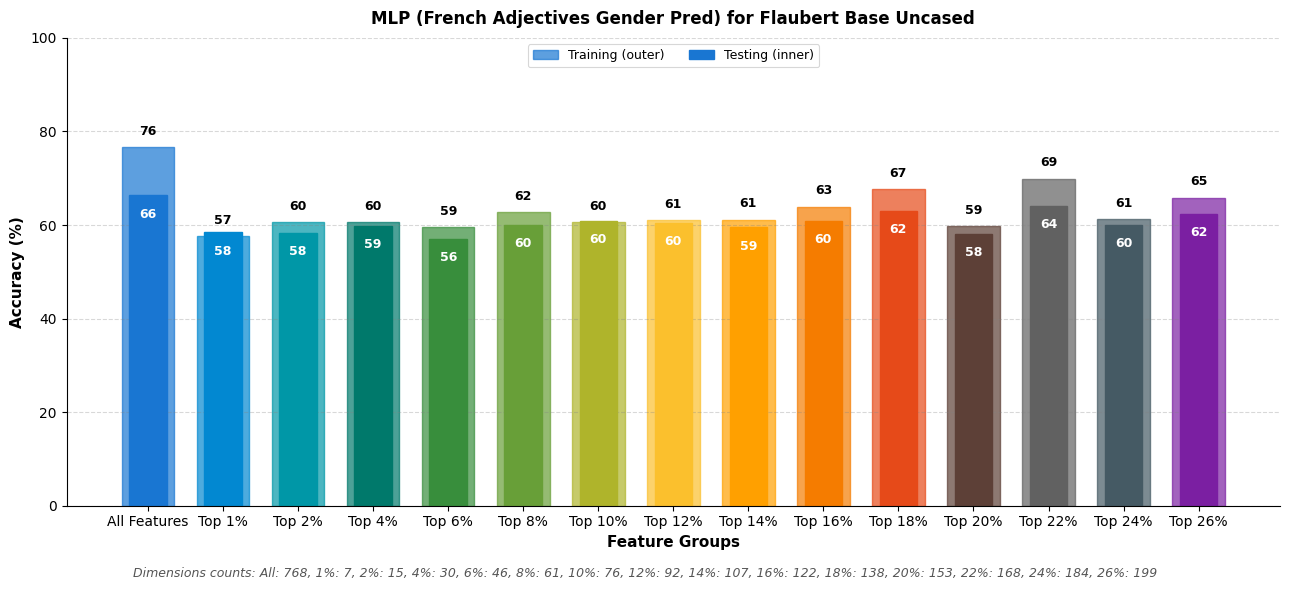

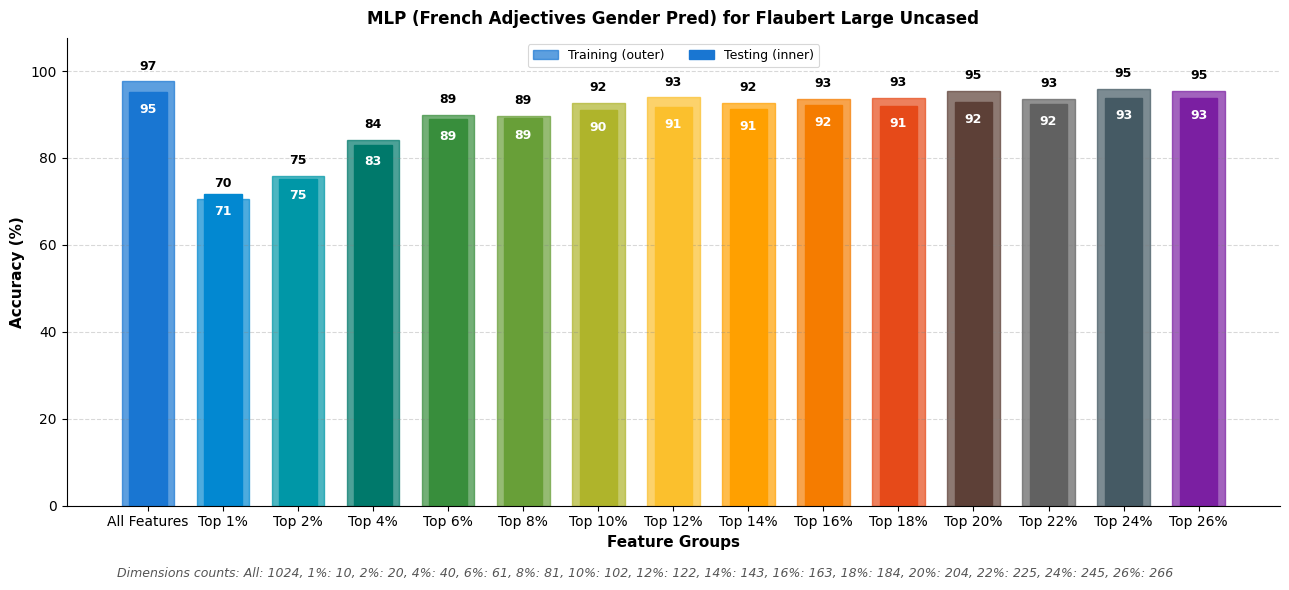

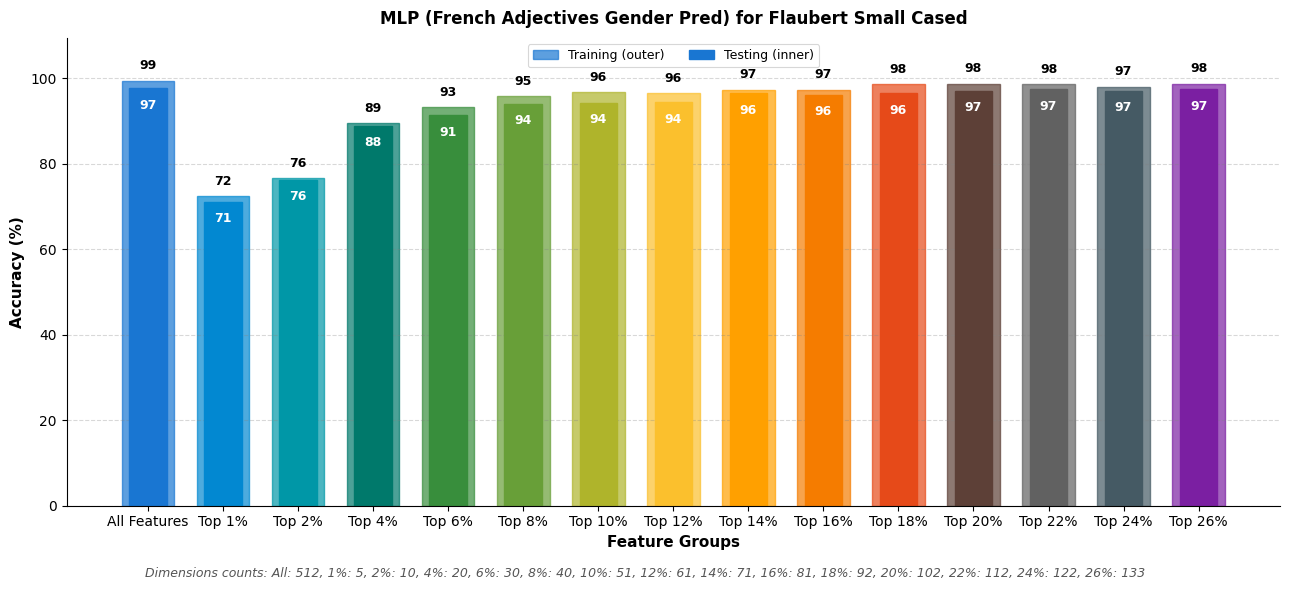

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

# --- Setup: Using variables computed earlier ---

# Convert baseline model accuracies to percentages.
baseline_test_accuracies = {name: model_accuracies[name] * 100 for name in trained_models.keys()}
baseline_train_accuracies = {name: training_accuracies[name] * 100 for name in trained_models.keys()}

# Compute each model's valid feature count from the SHAP CSV (non-NaN values)
model_valid_counts = {}
for model in baseline_test_accuracies.keys():
    if model in shap_feature_importance_all.columns:
        model_valid_counts[model] = shap_feature_importance_all[model].notnull().sum()
    else:
        model_valid_counts[model] = len(shap_feature_importance_all)

# Define group labels dynamically:
#   1. Baseline: "All Features"
#   2. One group per each SHAP percentage
group_labels = ["All Features"] + [f"Top {p}%" for p in percentages]
num_groups = len(group_labels)

# Calculate feature counts for each percentage group (for the footer)
feature_counts = {}
model_names = list(baseline_test_accuracies.keys())
for percent in percentages:
    counts = []
    for m in model_names:
        valid_count = model_valid_counts[m]
        expected_count = int((percent / 100) * valid_count)
        counts.append(expected_count)
    feature_counts[percent] = counts

# --- Create a separate figure for each model ---
for i, model in enumerate(model_names):
    fig, ax = plt.subplots(figsize=(13, 6))

    # x-axis positions: one position per group
    index_groups = np.arange(num_groups)

    # Define bar widths and spacing
    train_bar_width = 0.7    # Full-width bar for training accuracy
    test_bar_width = 0.5     # Narrower bar for test accuracy

    # Space above the bar for training label
    train_label_padding = 2  # Units above bar

    # Material Design color palette (darker/richer colors that work well with white text)
    # These colors have good contrast for white labels
    material_colors = [
        "#1976D2",  # Blue 700
        "#0288D1",  # Light Blue 700
        "#0097A7",  # Cyan 700
        "#00796B",  # Teal 700
        "#388E3C",  # Green 700
        "#689F38",  # Light Green 700
        "#AFB42B",  # Lime 700
        "#FBC02D",  # Yellow 700
        "#FFA000",  # Amber 700
        "#F57C00",  # Orange 700
        "#E64A19",  # Deep Orange 700
        "#5D4037",  # Brown 700
        "#616161",  # Grey 700
        "#455A64",  # Blue Grey 700
        "#7B1FA2",  # Purple 700
        "#C2185B",  # Pink 700
        "#D32F2F",  # Red 700
        "#303F9F",  # Indigo 700
    ]

    # Make sure we have enough colors by cycling if needed
    if num_groups > len(material_colors):
        material_colors = material_colors * (num_groups // len(material_colors) + 1)

    # Use only the colors we need
    colors = material_colors[:num_groups]

    # Gather training & testing values for each group
    train_vals = []
    test_vals = []
    for j, group_lbl in enumerate(group_labels):
        if j == 0:
            # Baseline group
            t_val = baseline_train_accuracies[model]
            te_val = baseline_test_accuracies[model]
        else:
            # SHAP group
            pct = percentages[j - 1]
            t_val = new_model_training_accuracies.get((model, pct), 0) * 100
            te_val = new_model_accuracies.get((model, pct), 0) * 100
        train_vals.append(t_val)
        test_vals.append(te_val)

    # Create paired bar chart with internal labels
    for j in range(num_groups):
        x_center = index_groups[j]

        # Convert hex color to RGB for manipulation
        rgb_color = mcolors.to_rgb(colors[j])

        # Training bar - slightly lighter
        train_color = colors[j]
        # Lighter edge for training bar
        train_color_edge = colors[j]

        train_bar = ax.bar(x_center, train_vals[j], train_bar_width,
               color=train_color, alpha=0.7,  # Slightly more transparent
               edgecolor=train_color_edge, linewidth=1.0,
               zorder=1)

        # Testing bar - full color
        test_color = colors[j]
        # Slightly darker edge for test bar
        test_color_edge = colors[j]

        test_bar = ax.bar(x_center, test_vals[j], test_bar_width,
               color=test_color, alpha=1.0,  # Full opacity
               edgecolor=test_color_edge, linewidth=1.0,
               zorder=2)

        # Labels placement
        # Training label - ABOVE the bar with black text
        if train_vals[j] >= 5:  # Only if bar is tall enough
            label_y_train = train_vals[j] + train_label_padding  # 2 units above bar
            ax.text(x_center, label_y_train, f"{int(train_vals[j])}",
                    ha='center', va='bottom', fontsize=9, fontweight='bold',
                    color='black', zorder=5)

        # Testing label - INSIDE the bar with white text (same as before)
        if test_vals[j] >= 10:  # Only if bar is tall enough
            label_y_test = test_vals[j] - 4  # 4 units from top
            ax.text(x_center, label_y_test, f"{int(test_vals[j])}",
                    ha='center', va='center', fontsize=9, fontweight='bold',
                    color='white', zorder=4)

    # Axis labels & title
    ax.set_xlabel("Feature Groups", fontsize=11, fontweight="bold")
    ax.set_ylabel("Accuracy (%)", fontsize=11, fontweight="bold")
    model_name_formatted = model.replace('_', ' ').title()

    # More professional title with proper capitalization
    ax.set_title(f"MLP (French Adjectives Gender Pred) for {model_name_formatted}",
                 fontsize=12, fontweight="bold", pad=10)

    # Set x-ticks and clean up the layout
    ax.set_xticks(index_groups)
    ax.set_xticklabels(group_labels, fontsize=10)

    # Set y-axis limit with some padding for the training labels
    max_train_val = max(train_vals)
    y_max = max(100, max_train_val + 10)  # At least 100 or more to fit labels
    ax.set_ylim(0, y_max)

    # Better grid - only horizontal lines with improved styling
    ax.grid(axis='y', linestyle="--", alpha=0.3, color='gray', zorder=0)

    # Better spines - remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)

    # Add a professional footer with feature counts
    footer_parts = []
    footer_parts.append(f"All: {model_valid_counts[model]}")
    for p in percentages:
        footer_parts.append(f"{p}%: {feature_counts[p][i]}")

    footer_text = "Dimensions counts: " + ", ".join(footer_parts)
    plt.figtext(0.5, 0.01, footer_text, ha='center', fontsize=9,
                fontstyle='italic', color='#555555')

    # Better legend - clear, concise, and professional
    train_patch = Patch(facecolor=material_colors[0], alpha=0.7, edgecolor=material_colors[0], linewidth=1.0,
                        label="Training (outer)")
    test_patch = Patch(facecolor=material_colors[0], alpha=1.0, edgecolor=material_colors[0], linewidth=1.0,
                       label="Testing (inner)")

    leg = ax.legend(handles=[train_patch, test_patch],
                    loc="upper center",
                    frameon=True, framealpha=0.9, edgecolor='lightgray',
                    fontsize=9, bbox_to_anchor=(0.5, 1), ncol=min(2, num_groups))
    leg.get_frame().set_linewidth(0.8)

    plt.tight_layout(rect=[0, 0.03, 1, 0.98])  # Adjust layout to make room for footer
    plt.savefig(f"{model}_gender_pred_performance.png", dpi=300, bbox_inches='tight')
    plt.show()

# Step 7) Show the feature index numbers (dimensions) for each model's top N% SHAP features

In [ ]:
import pandas as pd

# List to collect all rows for the summary table
all_rows = []

# For each model in top_features_dict (keys should correspond to model names/columns in the SHAP CSV)
for model_name, perc_dict in top_features_dict.items():
    # Compute the valid feature count for this model (non-NaN values in its SHAP column)
    if model_name in shap_feature_importance_all.columns:
        valid_count = shap_feature_importance_all[model_name].notnull().sum()
    else:
        valid_count = len(shap_feature_importance_all)

    for percent, feature_names in perc_dict.items():
        # Get the index positions for each selected feature from the SHAP table (matches on "Feature" column)
        feature_indexes = []
        for fname in feature_names:
            match = shap_feature_importance_all[shap_feature_importance_all["Feature"] == fname]
            if not match.empty:
                feature_indexes.append(match.index[0])

        # Calculate the expected number of features for this model and percentage
        expected_count = int((percent / 100) * valid_count)

        all_rows.append({
            "Model": model_name,
            "Top %": f"{percent}%",
            "Total Features": valid_count,
            "Top % Feature Count": expected_count,
            "Feature Indexes": ", ".join(map(str, feature_indexes))
        })

# Convert the collected rows into a DataFrame
combined_df = pd.DataFrame(all_rows)

# Save the DataFrame to a CSV file
combined_df.to_csv("mlp_shap_top_nouns_gender_feature_indexes_summary.csv", index=False)

# Display the final combined table
print("\nCombined SHAP Feature Index Table Saved as 'mlp_shap_top_feature_indexes_summary.csv'")
display(combined_df)



Combined SHAP Feature Index Table Saved as 'mlp_shap_top_feature_indexes_summary.csv'


Model Top %  Total Features  Top % Feature Count  \
0      flaubert_base_cased    1%             768                    7   
1      flaubert_base_cased    2%             768                   15   
2      flaubert_base_cased    4%             768                   30   
3      flaubert_base_cased    6%             768                   46   
4      flaubert_base_cased    8%             768                   61   
5      flaubert_base_cased   10%             768                   76   
6      flaubert_base_cased   12%             768                   92   
7      flaubert_base_cased   14%             768                  107   
8      flaubert_base_cased   16%             768                  122   
9      flaubert_base_cased   18%             768                  138   
10     flaubert_base_cased   20%             768                  153   
11   flaubert_base_uncased    1%             768                    7   
12   flaubert_base_uncased    2%             768                   15   
13   flaubert_base_uncased    4%             768                   30   
14   flaubert_base_uncased    6%             768                   46   
15   flaubert_base_uncased    8%             768                   61   
16   flaubert_base_uncased   10%             768                   76   
17   flaubert_base_uncased   12%             768                   92   
18   flaubert_base_uncased   14%             768                  107   
19   flaubert_base_uncased   16%             768                  122   
20   flaubert_base_uncased   18%             768                  138   
21   flaubert_base_uncased   20%             768                  153   
22  flaubert_large_uncased    1%            1024                   10   
23  flaubert_large_uncased    2%            1024                   20   
24  flaubert_large_uncased    4%            1024                   40   
25  flaubert_large_uncased    6%            1024                   61   
26  flaubert_large_uncased    8%            1024                   81   
27  flaubert_large_uncased   10%            1024                  102   
28  flaubert_large_uncased   12%            1024                  122   
29  flaubert_large_uncased   14%            1024                  143   
30  flaubert_large_uncased   16%            1024                  163   
31  flaubert_large_uncased   18%            1024                  184   
32  flaubert_large_uncased   20%            1024                  204   
33    flaubert_small_cased    1%             512                    5   
34    flaubert_small_cased    2%             512                   10   
35    flaubert_small_cased    4%             512                   20   
36    flaubert_small_cased    6%             512                   30   
37    flaubert_small_cased    8%             512                   40   
38    flaubert_small_cased   10%             512                   51   
39    flaubert_small_cased   12%             512                   61   
40    flaubert_small_cased   14%             512                   71   
41    flaubert_small_cased   16%             512                   81   
42    flaubert_small_cased   18%             512                   92   
43    flaubert_small_cased   20%             512                  102   

                                      Feature Indexes  
0             5, 31, 102, 24, 140, 2, 26, 113, 45, 57  
1   5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ...  
2   5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ...  
3   5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ...  
4   5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ...  
5   5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ...  
6   5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ...  
7   5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ...  
8   5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ...  
9   5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ...  
10  5, 31, 102, 24, 140, 2, 26, 113, 45, 57, 181, ...  
11              0, 3, 69, 14, 32, 83, 79, 93, 170, 17  
12  0, 